<p style="font-size:36px;text-align:center"> <b>Credit Card Fraud Detection</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/mlg-ulb/creditcardfraud </p>
<p>Data: The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.</p>
<p> Download creditcard.csv from Kaggle.</p> 

<h6> Context:</h6>
<p>It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.</p>
<p>The dataset contains transactions made by credit cards in September 2013 by european cardholders.</p>
<p>This dataset presents transactions that occurred in two days</p>

<h6> Problem statement : </h6>
<p> Classify fraudulent and non-fraudulent credit card transactions.</p>

<h2>1.2. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/mlg-ulb/creditcardfraud
- We have one data files that contains information about the Credit card transactions
- <p> 
    Data file's information:
    <ul> 
        <li>
        Creditcard.csv (V1, V2,....,V28, Time, Amount,Class)
        </li>
        <li>
        It contains only numerical input variables
        </li>
    </ul>
</p>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are two different classes a credit card transaction can be classified into => classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

Metric(s): 
* f1-score
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict which of the two classes the datapoints belong to.
</p>
<p> Constraints:
</p>
* Interpretability
* No Latency constraints.

<h1> 3. Exploratory Data Analysis </h1>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.linear_model import SGDClassifier
from collections import Counter
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import parfit.parfit as pf
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler
from pandas_profiling import ProfileReport
from tensorflow import set_random_seed
from keras.layers import Dense, BatchNormalization
from keras.initializers import he_normal
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
import xgboost as xgb
import scipy.stats as ss
import matplotlib
np.random.seed(2020)
set_random_seed(2020)
matplotlib.use('nbagg')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<h2> 3.1 Reading Data </h2>

In [443]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.shape

(284807, 31)

In [4]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
dataset.isnull().values.any()

False

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

- There are no missing values in the dataset

<h3> 3.1.1 Distribution of points across each class </h3>

0    284315
1       492
Name: Class, dtype: int64
--------------------------------------------------------


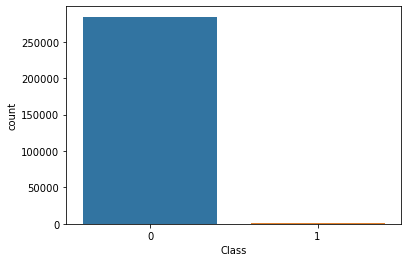

In [9]:
print(dataset['Class'].value_counts())
print('-'*56)
sns.countplot(dataset['Class'])
plt.show()

Number of Safe transactions  284315 , ( 99.82725143693798 %)
Number of fraud transactions 492 , ( 0.1727485630620034 %)
--------------------------------------------------------------------------------


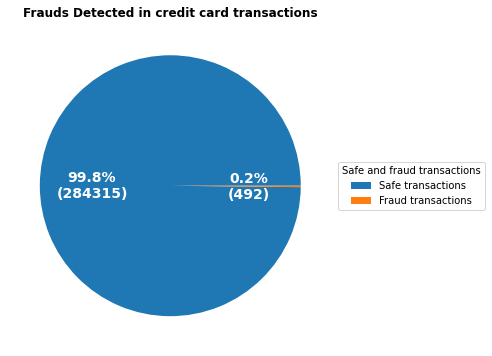

In [10]:
y_value_counts = dataset['Class'].value_counts()
print("Number of Safe transactions ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[0]+y_value_counts[1]))*100,"%)")
print("Number of fraud transactions", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[0]+y_value_counts[1]))*100,"%)")

print('-'*80)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Safe transactions", "Fraud transactions"]

data = [y_value_counts[0], y_value_counts[1]]
ingredients = [x for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title = "Safe and fraud transactions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("Frauds Detected in credit card transactions", weight='bold')

plt.show()


- There are 284807 data samples each with 28 obfuscated features + time + amount of transaction (overall 30 features)
- We only have numerical features with no missing data
- we have 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.

<h2>Univariate Analysis of features </h2>

In [11]:
fraud = dataset[dataset['Class'] == 1]
non_fraud = dataset[dataset['Class'] == 0]

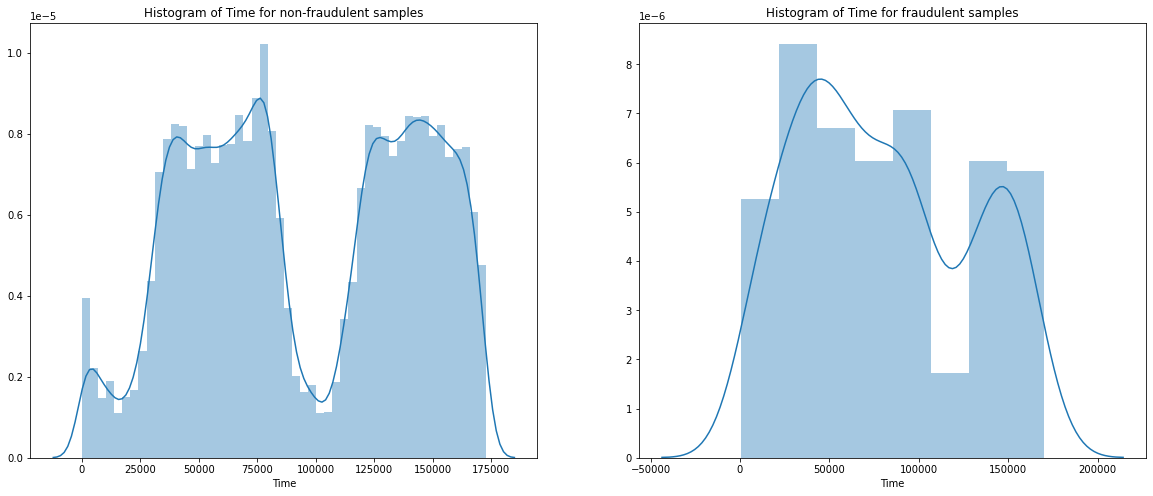

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title('Histogram of Time for non-fraudulent samples')
sns.distplot(non_fraud["Time"])
plt.subplot(1, 2, 2)
plt.title('Histogram of Time for fraudulent samples')
sns.distplot(fraud["Time"])

as we can see the time feature doesnt yield any important information as there is not much difference in time for fradulent and non fradulent transactions so we can ignore the time feature

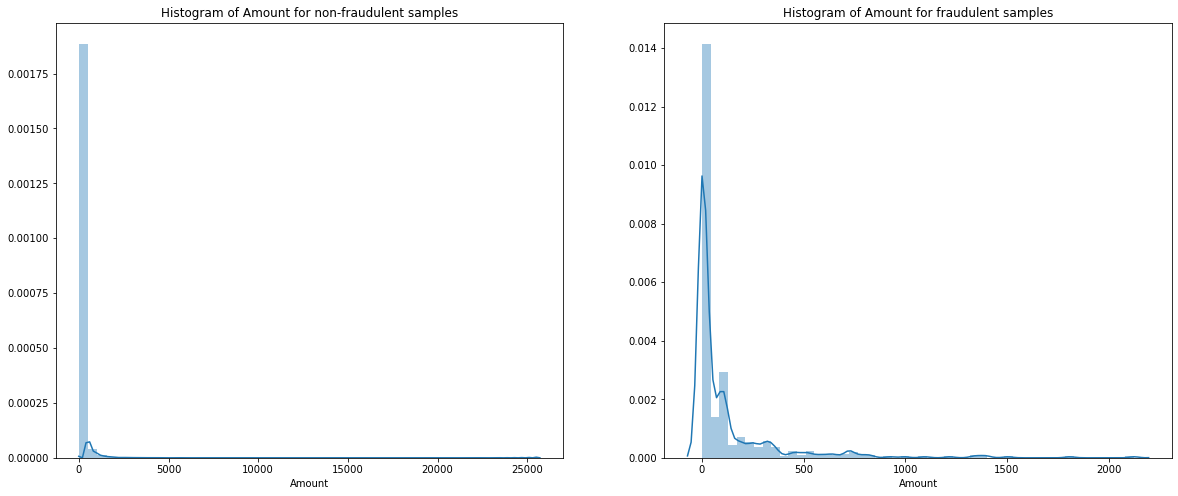

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title('Histogram of Amount for non-fraudulent samples')
sns.distplot(non_fraud["Amount"])
plt.subplot(1, 2, 2)
plt.title('Histogram of Amount for fraudulent samples')
sns.distplot(fraud["Amount"])

- Distribution of fradulent transactions has a shorter tail
- There are outliers present in the amount feature
- The amount in nonfradulent transactions is more than the amount in fradulent transactions
- Most of the amount values are grouped near zero
- Amount is an important feature

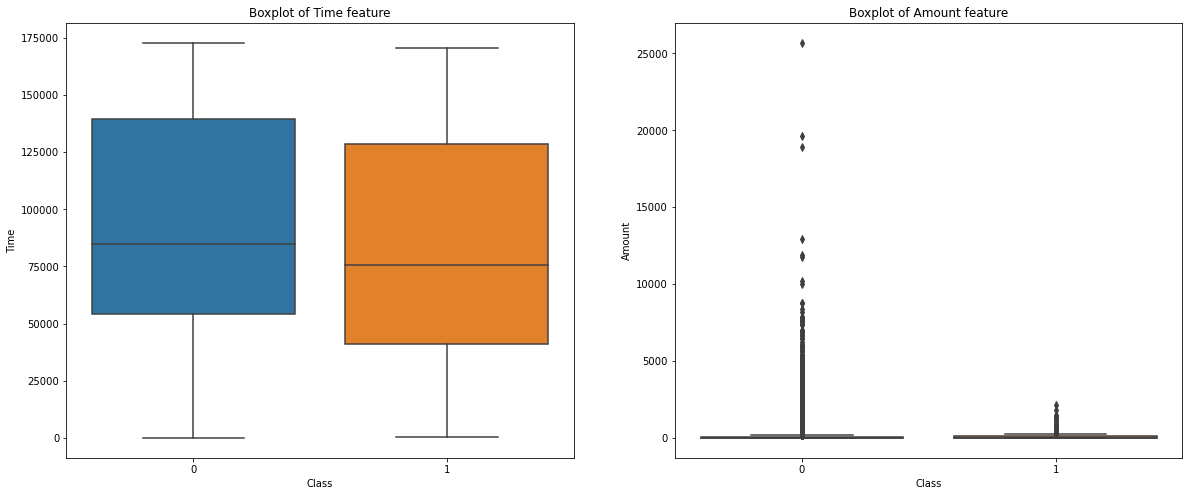

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title('Boxplot of Time feature')
sns.boxplot(x='Class', y='Time', data=dataset)
plt.subplot(1, 2, 2)
plt.title('Boxplot of Amount feature')
sns.boxplot(x='Class', y='Amount', data=dataset)

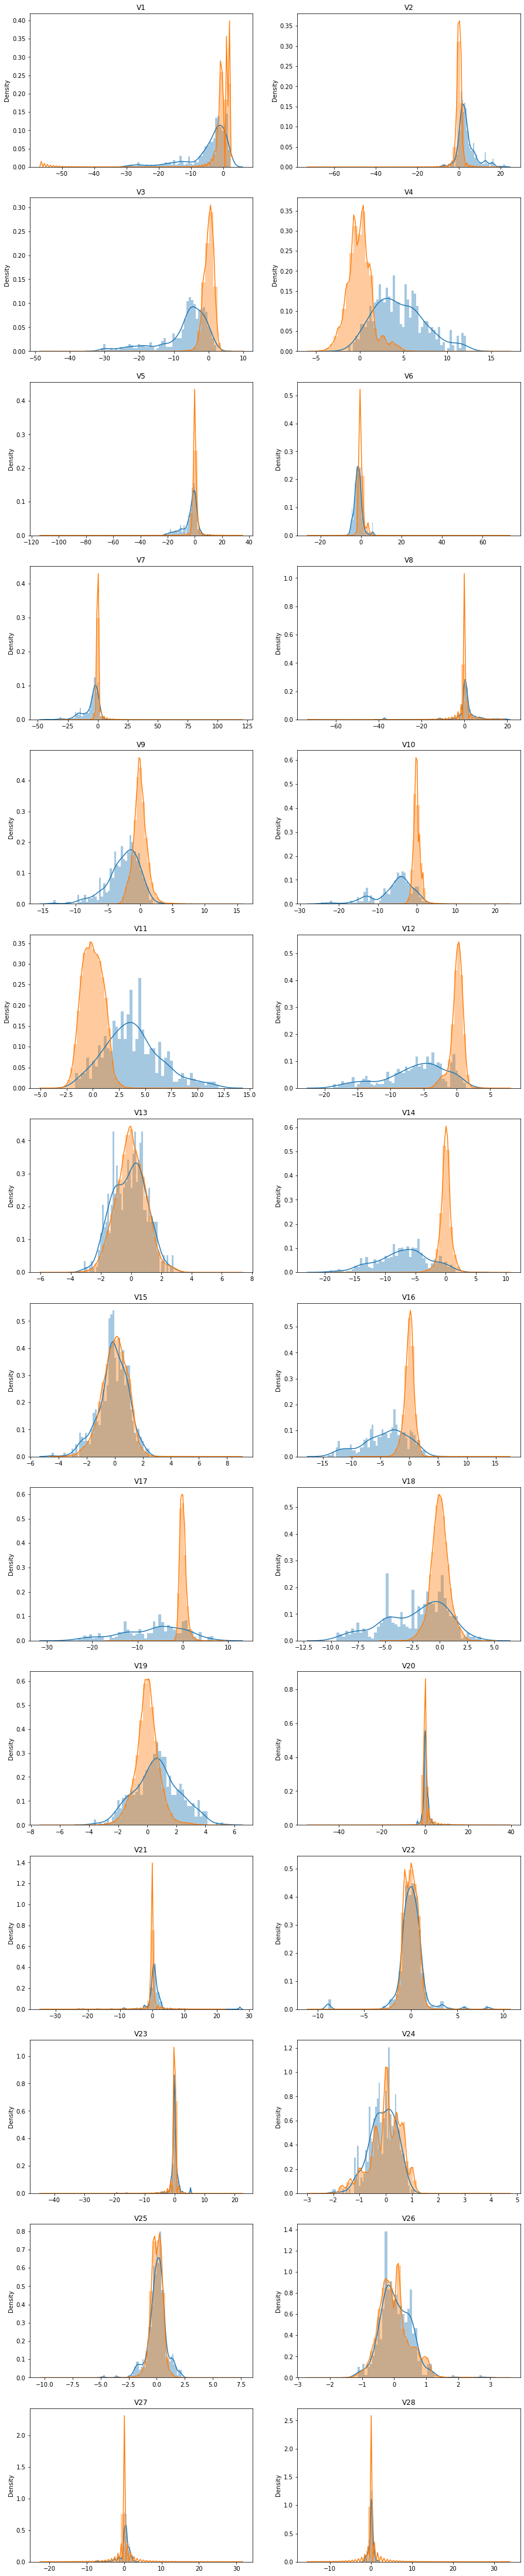

In [15]:
import matplotlib.gridspec as gridspec
columns = dataset.iloc[:,1:29].columns

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

frauds = dataset.Class == 1
normals = dataset.Class == 0

for n, col in enumerate(dataset[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(dataset[col][frauds], bins = 50) #Will receive the "semi-salmon" violin
    sns.distplot(dataset[col][normals], bins = 50) #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

<h2>Bivariate Analysis of Time and Amount features </h2>

<Figure size 1440x576 with 0 Axes>

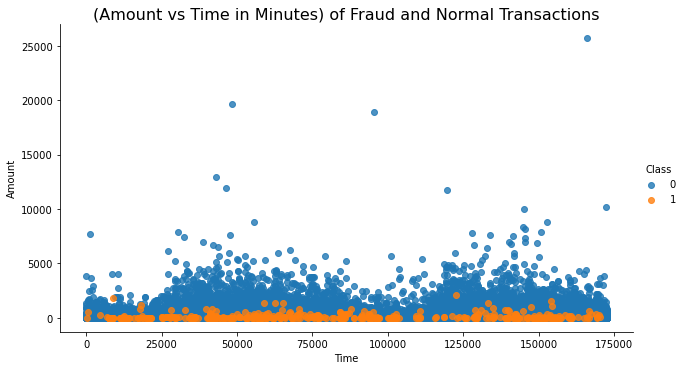

In [16]:
#Looking the Amount and time distribuition of FRAUD transactions
plt.figure(figsize=(20,8))
ax = sns.lmplot(y="Amount", x="Time", fit_reg=False,aspect=1.8,
                data=dataset, hue='Class')
plt.title("(Amount vs Time in Minutes) of Fraud and Normal Transactions",fontsize=16)
plt.show()

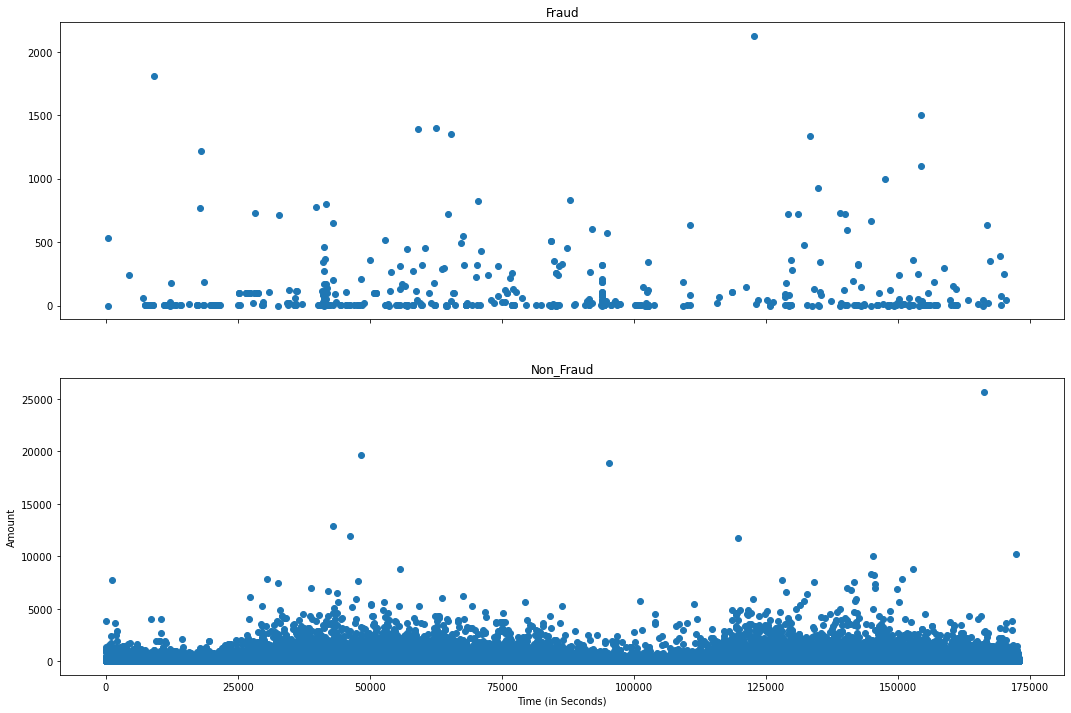

In [17]:
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(18,12))

axis_1.scatter(dataset['Time'][dataset['Class'] == 1], dataset['Amount'][dataset['Class'] == 1])
axis_1.set_title('Fraud')

axis_2.scatter(dataset['Time'][dataset['Class'] == 0], dataset['Amount'][dataset['Class'] == 0])
axis_2.set_title('Non_Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

- The time feature doesnt yield much important information

## Plotting Covariance Matrix 

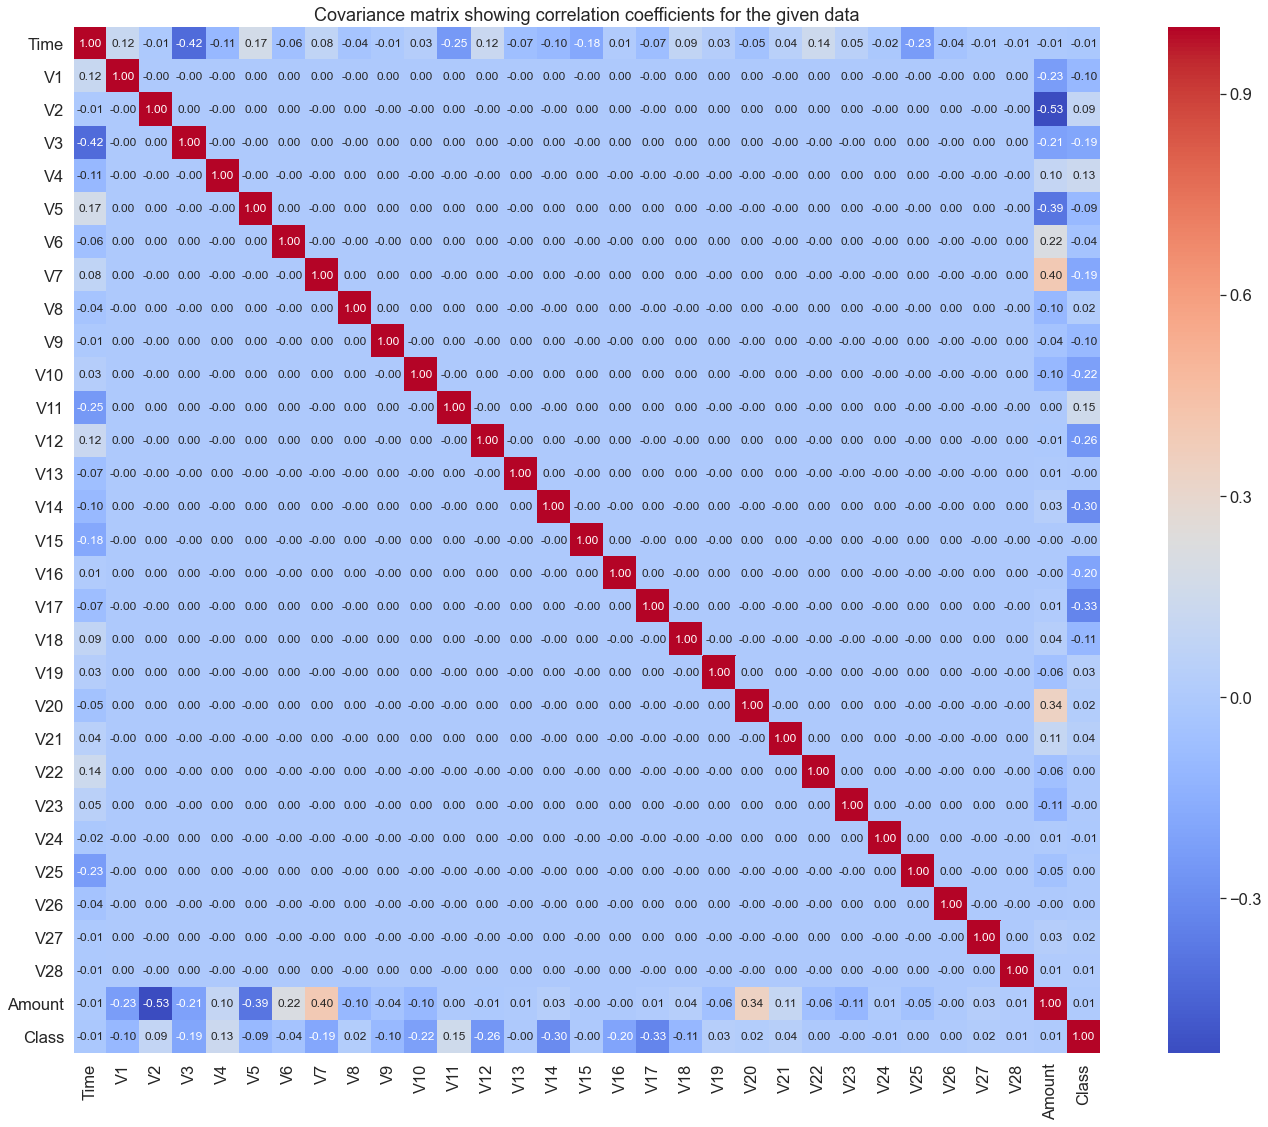

In [18]:
from sklearn.preprocessing import StandardScaler 
cols = dataset.columns 
std = StandardScaler() 
X_std = std.fit_transform(dataset[cols].iloc[:,range(len(dataset.columns))].values)

cov_mat =np.cov(X_std.T)
plt.figure(figsize=(20,16))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap='coolwarm',                 
                 yticklabels=cols, xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients for the given data', size = 18)
plt.tight_layout()
plt.show()

- As we can see there is no correlation seen in data because the dataset is very highly imbalanced.

## Fitting Machine learning models on the imbalanced data

In [19]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    print('Accuracy: ', accuracy_score(test_y,predict_y))
    print('Recall: ', recall_score(test_y,predict_y))
    print('Precision: ', precision_score(test_y,predict_y))
    print('F1 score: ', f1_score(test_y, predict_y))
    
    plt.show()

In [20]:
def plot_precison_recall_curve(model,x_test_data, y_test_data):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(x_test_data)[:,1]

    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_data, y_pred_prob)

    print('Area under precision recall curve: ', auc(recall, precision))

    # Plot ROC curve
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

In [21]:
def plot_roc_auc_curve(model, x_test_data, y_test_data):
    y_pred_prob = model.predict_proba(x_test_data)[:,1]
    
    fpr, tpr, tr = roc_curve(y_test_data, y_pred_prob)
    
    rocauc = roc_auc_score(y_test_data, y_pred_prob)
    
    print('ROC Area Under Curve (ROC_AUC): ',rocauc)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'r', label='AUC = %.3f'% rocauc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')

    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.show()

In [22]:
def feature_importance(model, feat, model_name):
    plt.figure(figsize = (9,5))

    feat_import = pd.DataFrame({'Feature': feat, 'Feature importance': model.feature_importances_})
    feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

    g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    g.set_title('Features importance - '+model_name,fontsize=20)
    plt.show()

### Data Preprocessing

In [444]:
dataset = dataset.drop('Time', axis=1)

In [445]:
# Since the amount features has outliers we will use robust scaling instead of standard scaling
rob_amt = RobustScaler()
dataset['Amount'] = rob_amt.fit_transform(dataset['Amount'].values.reshape(-1,1))

### Train-Test split

In [446]:
X = dataset.drop(['Class'],axis=1)
Y = dataset.iloc[:,-1:]

In [447]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.3, random_state=0)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(139554, 29)
(85443, 29)
(59810, 29)
(139554, 1)
(85443, 1)
(59810, 1)


In [49]:
#distribution of classes across train and test data
print('the number of fraudulent transactions in train data is', y_train['Class'].value_counts()[1], 'and non fraudulent transactions is', y_train['Class'].value_counts()[0])
print('the number of fraudulent transactions in test data is', y_test['Class'].value_counts()[1], 'and non fraudulent transactions is', y_test['Class'].value_counts()[0])
print('the number of fraudulent transactions in validation data is', y_val['Class'].value_counts()[1], 'and non fraudulent transactions is', y_val['Class'].value_counts()[0])

the number of fraudulent transactions in train data is 241 and non fraudulent transactions is 139313
the number of fraudulent transactions in test data is 148 and non fraudulent transactions is 85295
the number of fraudulent transactions in validation data is 103 and non fraudulent transactions is 59707


### Logistic Regression

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   11.3s remaining:   22.6s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   11.5s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   12.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   19.3s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.8s finished


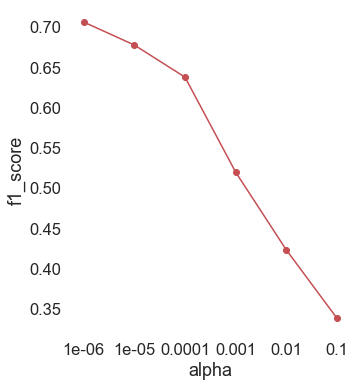

SGDClassifier(alpha=1e-06, loss='log', random_state=0) 0.7065217391304347


In [29]:
param = {'alpha':[0.000001,0.00001,0.0001, 0.001, 0.01, 0.1]}

paramGrid = ParameterGrid(param)
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier(loss='log', random_state=0), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score")

print(bestModel, bestScore)

In [30]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.999133925541004
Recall:  0.6554054054054054
Precision:  0.8083333333333333
F1 score:  0.7238805970149254


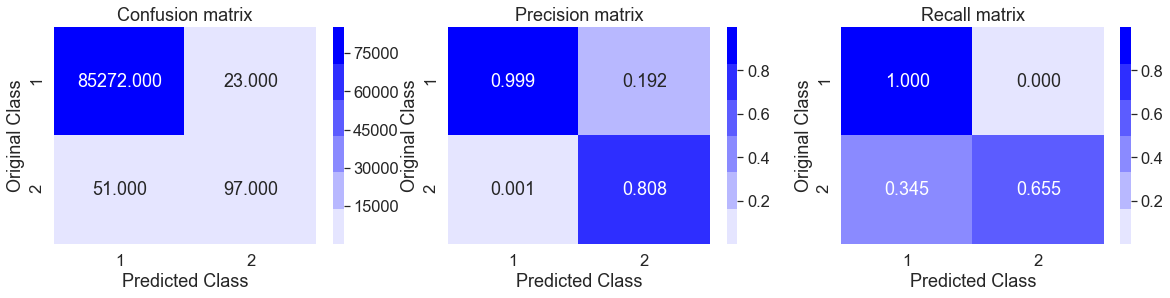

In [31]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.6827627966143519


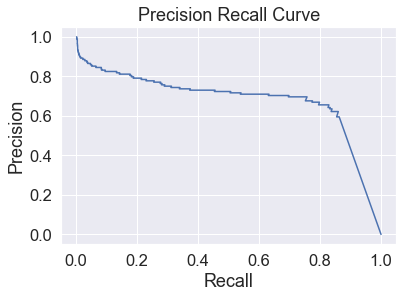

In [32]:
plot_precison_recall_curve(bestModel, x_test, y_test)

### Random Forest Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:  9.7min remaining:   52.9s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 10.9min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   16.5s finished


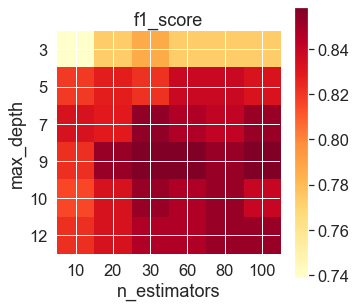

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=30,
                       n_jobs=-1, random_state=0) 0.8586956521739131


In [33]:
params= {
    'max_depth':[3,5,7,9,10,12],
    'n_estimators':[10,20,30,60,80,100]
}

paramGrid = ParameterGrid(params)
bestModel, bestScore, allModels, allScores = pf.bestFit(RandomForestClassifier(random_state=0, n_jobs=-1, criterion='entropy'), 
                                                        paramGrid,x_train, y_train, x_val, y_val, nfolds =5,
                                                        metric = f1_score, scoreLabel = "f1_score", n_jobs=-1)

print(bestModel, bestScore)

In [34]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9994733330992591
Recall:  0.722972972972973
Precision:  0.963963963963964
F1 score:  0.8262548262548263


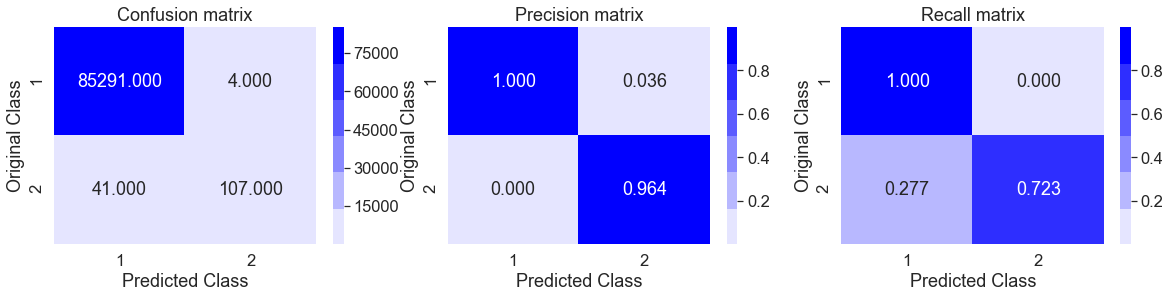

In [35]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.8209032438605356


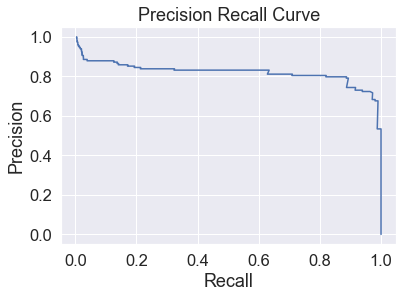

In [36]:
plot_precison_recall_curve(bestModel, x_test, y_test)

### Summary

In [305]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.title="Model Comparison"
x.field_names = ["Model","f1_score","Accuracy","Precision", "Recall"]
x.add_row(["Hyperparameter tuned Logistic Regression",72.38,99.91,80.83,65.54 ])
x.add_row(["Hyperparameter tuned Random Forest", 82.62, 99.94, 96.39, 72.29])

print(x)

+-------------------------------------------------------------------------------------+
|                                   Model Comparison                                  |
+------------------------------------------+----------+----------+-----------+--------+
|                  Model                   | f1_score | Accuracy | Precision | Recall |
+------------------------------------------+----------+----------+-----------+--------+
| Hyperparameter tuned Logistic Regression |  72.38   |  99.91   |   80.83   | 65.54  |
|    Hyperparameter tuned Random Forest    |  82.62   |  99.94   |   96.39   | 72.29  |
+------------------------------------------+----------+----------+-----------+--------+


- As we can see the accuracy is very high but as the dataset is heavily imbalanced so accuracy cannot be used as a metric to measure performance as there are high chances that the model is biased towards the majority class
- Since we cannot consider accuracy lets look at the recall value the accuracy is high but the recall value is pretty low
- Random Forest is performing pretty good on even when the classes are heavily imbalanced
- Now lets balance the classes and fit the models again

# Random UnderSampling

- since the data is highly imbalanced we undersample the majority class by randomly selecting points, to balance the classes

In [37]:
# we will sample only the train data
data = x_train
data['Class'] = y_train

fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0].sample(361, random_state=0)

non_fraud.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

data = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,-1.952086,1.555904,-2.849971,1.776523,-1.375121,-0.515174,-2.408811,0.136276,-1.021553,-2.365926,...,0.397417,-0.010347,0.017526,-0.023574,0.012163,0.017286,0.085724,0.038168,1.040066,0.400332
std,5.248111,3.559833,5.943994,3.131310,3.940794,1.732534,5.637561,5.093361,2.308075,4.356072,...,3.058923,1.243421,1.068701,0.576618,0.646041,0.468695,0.923995,0.373776,3.094832,0.490373
min,-29.200329,-8.402154,-30.177317,-3.329093,-21.225810,-5.773192,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-15.981649,-2.028024,-3.536716,-1.201992,-7.263482,-1.552593,-0.307413,0.000000
25%,-2.351175,-0.294346,-3.981619,-0.454093,-1.479796,-1.327820,-2.284186,-0.203703,-1.889388,-3.933848,...,-0.200815,-0.548020,-0.200460,-0.377148,-0.321417,-0.283191,-0.058761,-0.061760,-0.279571,0.000000
50%,-0.657258,0.609338,-0.944807,0.891655,-0.395519,-0.544565,-0.529554,0.110896,-0.430622,-0.553939,...,0.125102,0.040683,-0.015130,0.035704,0.041038,-0.059111,0.034242,0.021772,-0.035702,0.000000
75%,1.148273,2.222540,0.649863,3.313695,0.424501,0.145168,0.251482,0.775109,0.296437,0.080654,...,0.575818,0.577549,0.181302,0.406067,0.377575,0.270780,0.359226,0.181661,1.089779,1.000000
max,2.390655,22.057729,3.342831,11.927512,11.095089,6.474115,5.431271,19.168327,6.756717,11.708358,...,27.202839,8.361985,5.466230,1.157189,2.103868,2.374299,2.300164,1.779364,29.398030,1.000000


### Distribution of classes

Total data points in the dataset 139554
--------------------------------------------------------


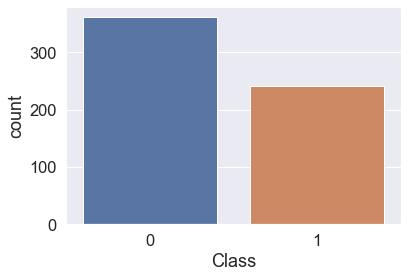

--------------------------------------------------------------------------------
Number of Safe transactions  (CLASS: 0) 361 , ( 59.966777408637874 %)
Number of fraud transactions (CLASS: 1) 241 , ( 40.033222591362126 %)


In [38]:
print('Total data points in the dataset',len(x_train))
print('-'*56)
sns.countplot(data['Class'])
plt.show()
print('-'*80)
print("Number of Safe transactions  (CLASS: 0)", data['Class'].value_counts()[0], ", (", (data['Class'].value_counts()[0]/(data['Class'].value_counts()[0]+data['Class'].value_counts()[1]))*100,"%)")
print("Number of fraud transactions (CLASS: 1)", data['Class'].value_counts()[1], ", (", (data['Class'].value_counts()[1]/(data['Class'].value_counts()[0]+data['Class'].value_counts()[1]))*100,"%)")

- we can see the majority class is 60 percent and minority class is 40 percent so the dataset is somewhat balanced

In [51]:
x_train = data.drop('Class', axis=1)
y_train = data.iloc[:,-1:]

In [54]:
#class distribution
print('the number of fraudulent transactions in train data is', y_train['Class'].value_counts()[1], 'and non fraudulent transactions is', y_train['Class'].value_counts()[0])
print('the number of fraudulent transactions in test data is', y_test['Class'].value_counts()[1], 'and non fraudulent transactions is', y_test['Class'].value_counts()[0])
print('the number of fraudulent transactions in validation data is', y_val['Class'].value_counts()[1], 'and non fraudulent transactions is', y_val['Class'].value_counts()[0])


the number of fraudulent transactions in train data is 241 and non fraudulent transactions is 361
the number of fraudulent transactions in test data is 148 and non fraudulent transactions is 85295
the number of fraudulent transactions in validation data is 103 and non fraudulent transactions is 59707


### Covariance Matrix

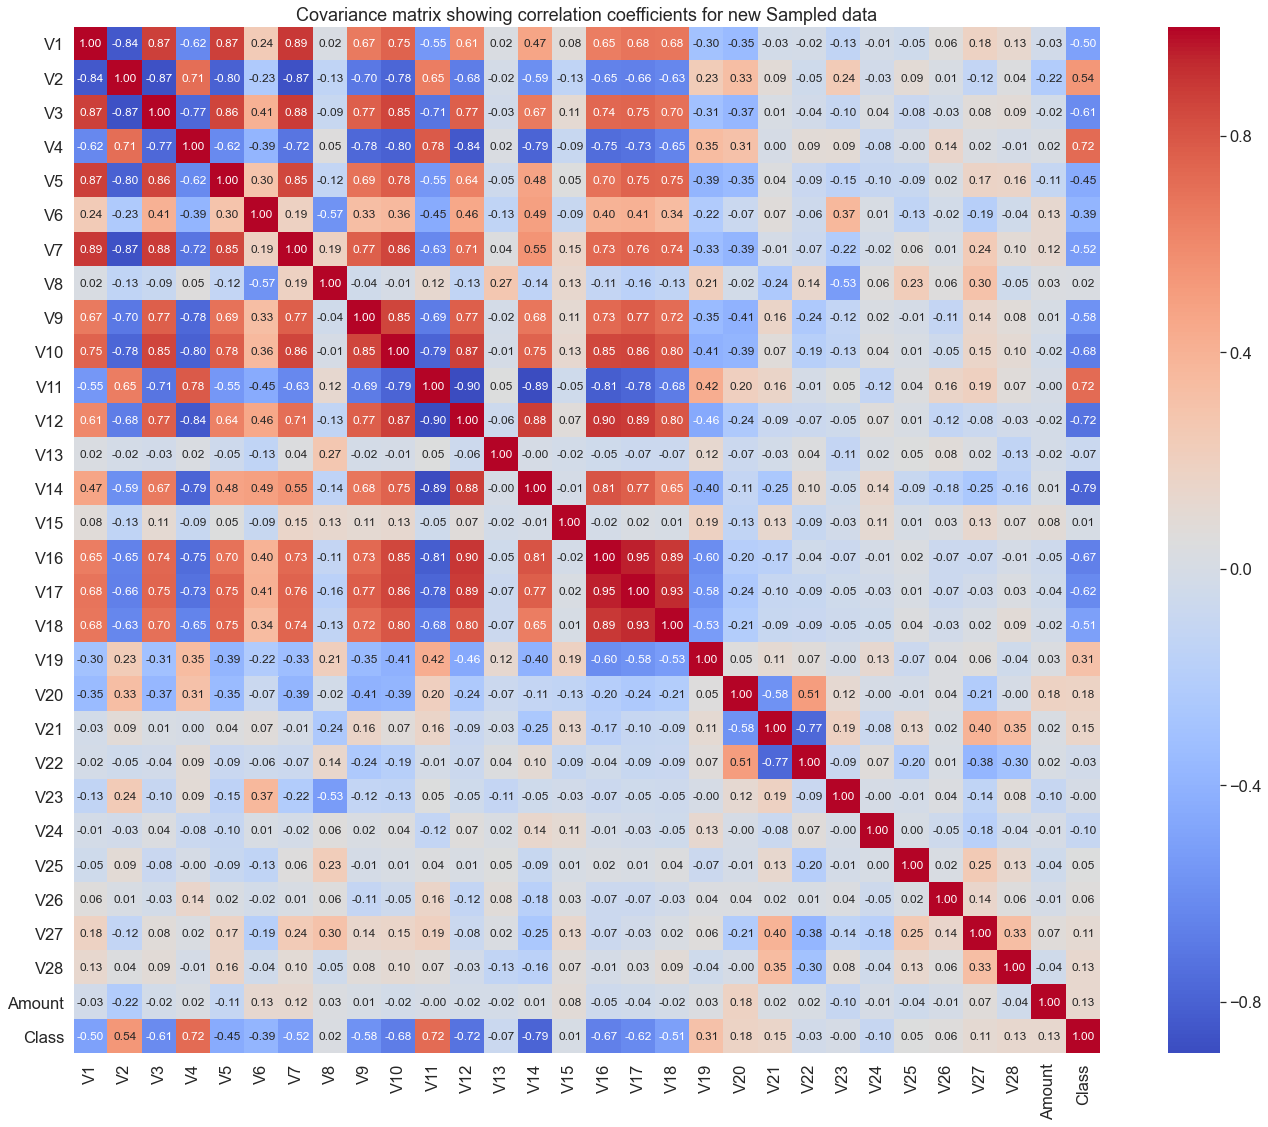

In [55]:
from sklearn.preprocessing import StandardScaler 
cols = data.columns 
std = StandardScaler() 
X_std = std.fit_transform(data[cols].iloc[:,range(len(data.columns))].values)

cov_mat =np.cov(X_std.T)
plt.figure(figsize=(20,16))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap='coolwarm',                 
                 yticklabels=cols, xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients for new Sampled data', size = 18)
plt.tight_layout()
plt.show()

__important features from the covariance matrix based on how highly these features correlate with the class__

In [56]:
df = pd.DataFrame(cov_mat, columns=data.columns )

In [57]:
imp_feats = data.columns[np.abs(df["Class"]) > 0.5]
imp_feats

Index(['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'Class'],
      dtype='object')

- As we can see features 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17','V18' highly correlate with the class
- some features have a very high positive correlation such as 'V2', 'V4', 'V11'
- some features have a very high negative correlation such as 'V3', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18'
- These features are very important in prediction 

## Dimensionality Reduction

### PCA

In [61]:
features = x_train
labels = y_train

In [62]:
pca =  PCA(n_components=2, random_state = 0) 
X_pca_embed = pca.fit_transform(features.values)

for_pca = np.hstack((X_pca_embed, labels.values.reshape(-1,1)))
for_pca_df = pd.DataFrame(data=for_pca, columns=['Dimension_x','Dimension_y','Class'])

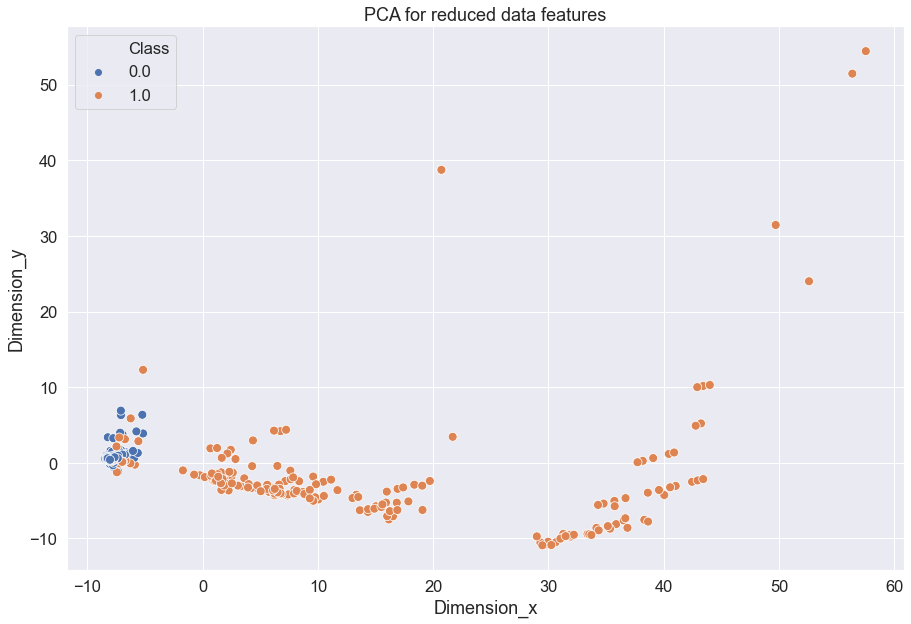

In [63]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Dimension_x', y='Dimension_y', hue='Class', data=for_pca_df, s=80)
plt.title('PCA for reduced data features')
plt.legend()
plt.show()

- As we can see from PCA that there is some overlap but overall most of the points are well seperated
- Now lets visualize TSNE plot

### TSNE with perplexity = 50

In [64]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, random_state = 0)
X_tsne_embed = tsne.fit_transform(features.values)
    
for_tsne = np.hstack((X_tsne_embed, labels.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Class'])

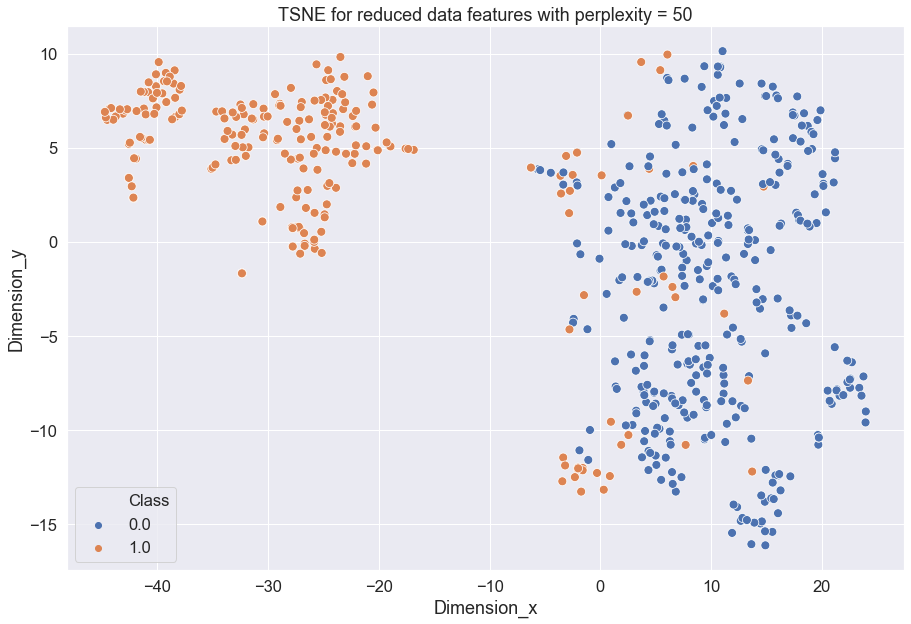

In [65]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Dimension_x', y='Dimension_y', hue='Class', data=for_tsne_df, s=80)
plt.title('TSNE for reduced data features with perplexity = 50')
plt.legend()
plt.show()

- From the TSNE plot also we can see that there is some overlap but both the classes are well seperated

### Spectral Embedding (nearest neighbors = 30)

In [66]:
nspec_emb = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=30)
X_nspec_embed = nspec_emb.fit_transform(features.values)

for_nspec = np.hstack((X_nspec_embed, labels.values.reshape(-1,1)))
for_nspec_df = pd.DataFrame(data=for_nspec, columns=['Dimension_x','Dimension_y','Class'])

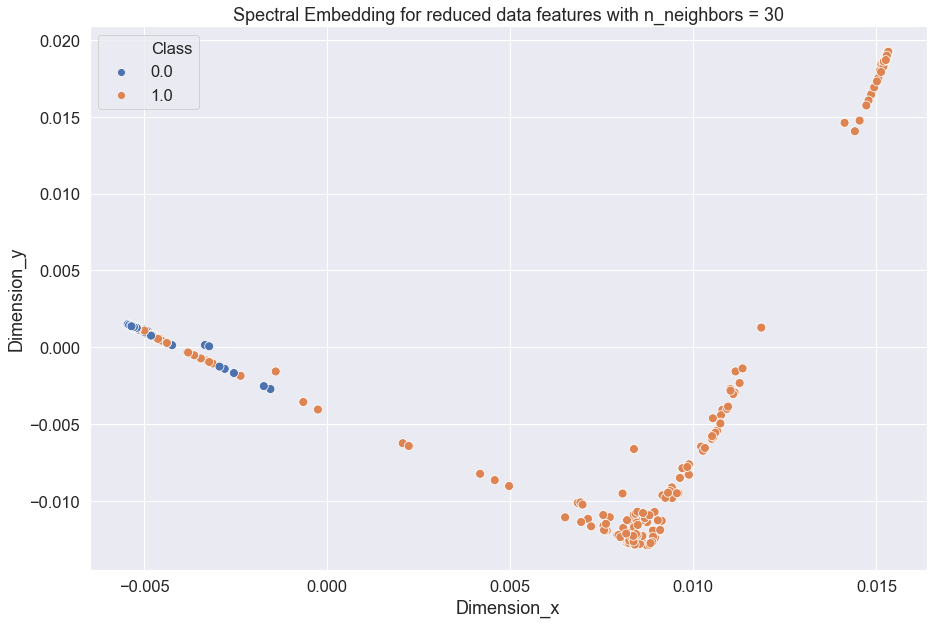

In [67]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Dimension_x', y='Dimension_y', hue='Class', data=for_nspec_df, s=80)
plt.title('Spectral Embedding for reduced data features with n_neighbors = 30')
plt.legend()
plt.show()

- We can clearly see that concentration of blue points i.e. class 0 is more near 0

## Fitting Machine Learning models on new undersampled data

### Logistic Regression

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    9.6s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    9.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    9.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.7s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.3s finished


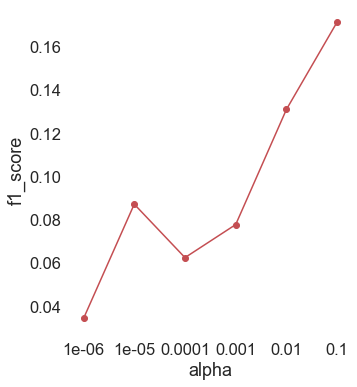

SGDClassifier(alpha=0.1, loss='log', random_state=0) 0.17159199237368922


In [68]:
param={'alpha':[0.000001,0.00001,0.0001, 0.001, 0.01, 0.1]}

paramGrid = ParameterGrid(param)
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier(loss='log', random_state=0), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [69]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9857331788443758
Recall:  0.8513513513513513
Precision:  0.09523809523809523
F1 score:  0.17131203263086334


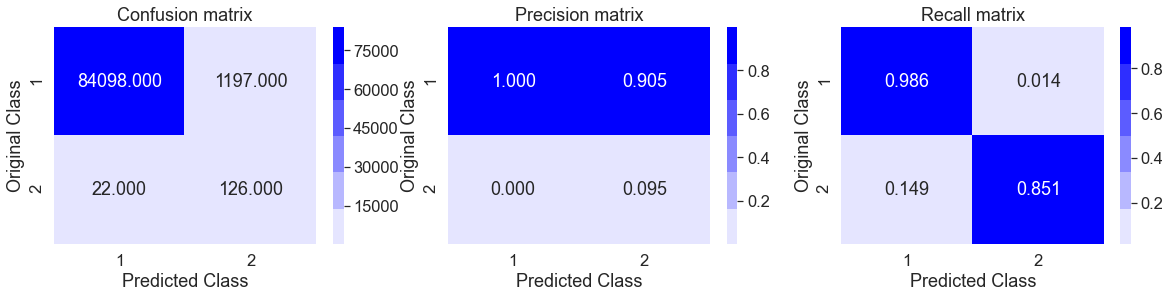

In [70]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.5140323981182894


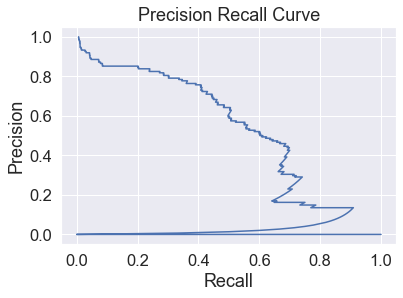

In [71]:
plot_precison_recall_curve(bestModel, x_test, y_test)

### Random Forest Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:   11.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   11.5s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   17.0s finished


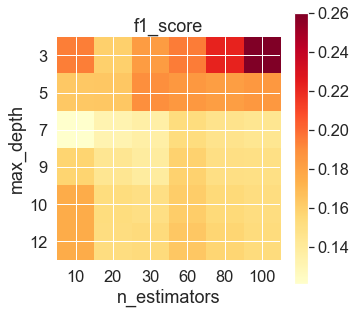

RandomForestClassifier(criterion='entropy', max_depth=3, n_jobs=4,
                       random_state=0) 0.2601156069364162


In [72]:
param_grid = {
    'max_depth':[3,5,7,9,10,12],
    'n_estimators':[10,20,30,60,80,100]
}

# Creating the classifier
paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(RandomForestClassifier(criterion ='entropy',random_state=0, n_jobs=4), 
                                                        paramGrid, x_train, y_train, x_val, y_val, metric = f1_score, 
                                                        scoreLabel = "f1_score", n_jobs=-1, nfolds =5)

print(bestModel, bestScore)

In [73]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.991655255550484
Recall:  0.8445945945945946
Precision:  0.15337423312883436
F1 score:  0.25960539979231567


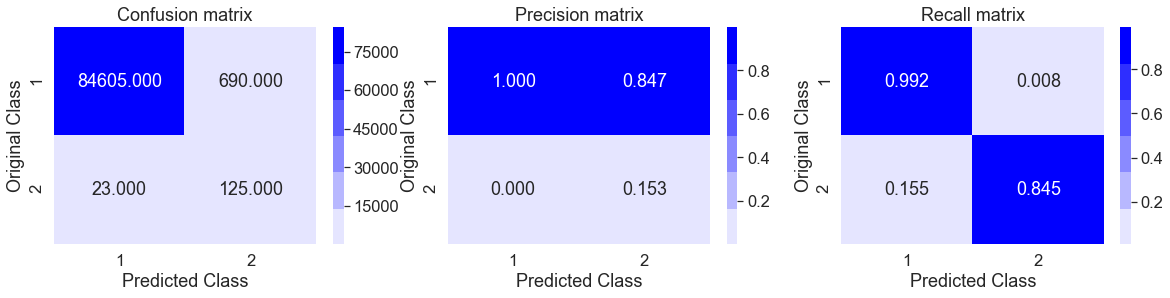

In [74]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.6622250264176806


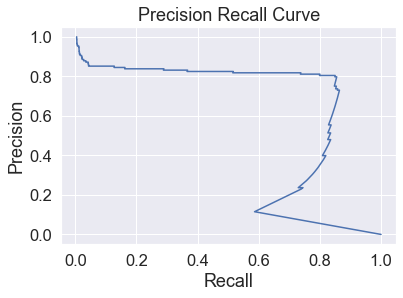

In [75]:
plot_precison_recall_curve(bestModel, x_test, y_test)

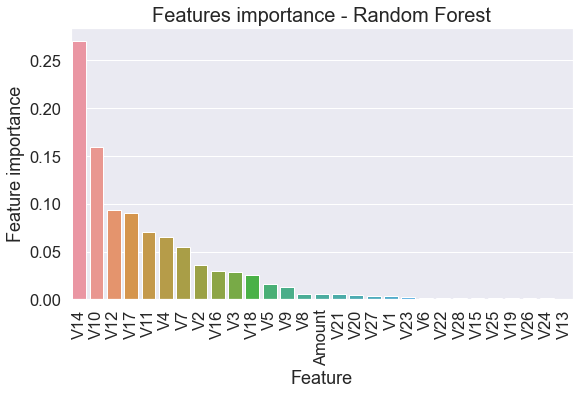

In [83]:
feats = list(x_train.columns)
feature_importance(bestModel, feats, 'Random Forest')

### XGBoost Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   14.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.3s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.5s finished


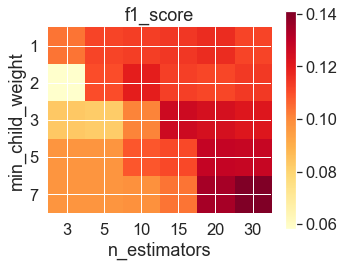

XGBClassifier(min_child_weight=7, missing=nan, n_estimators=30, n_jobs=4) 0.1409961685823755


In [84]:
param_grid = {'n_estimators':[3,5,10,15,20,30],
         'min_child_weight':[1,2,3,5,7]}

paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(xgb.XGBClassifier(random_state=0, n_jobs=4), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds =5)

print(bestModel, bestScore)

In [85]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9816719918542186
Recall:  0.8648648648648649
Precision:  0.07646356033452807
F1 score:  0.14050493962678376


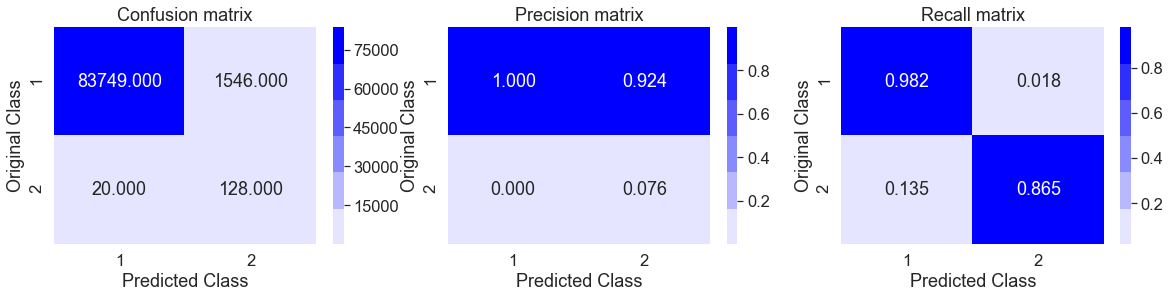

In [86]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.6566924761966972


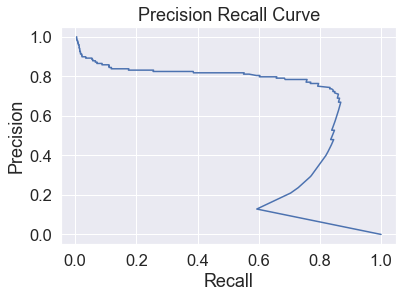

In [87]:
plot_precison_recall_curve(bestModel, x_test, y_test)

__Feature Importance__

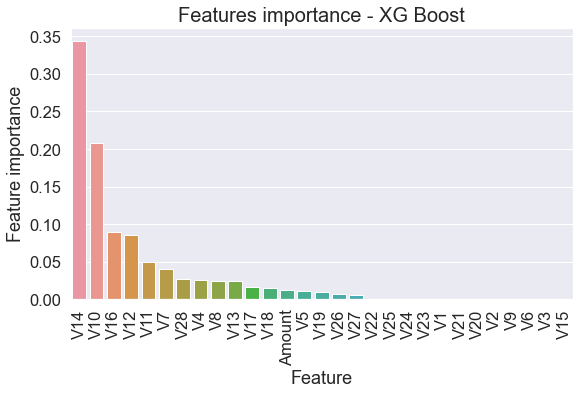

In [88]:
feature_importance(bestModel, feats, 'XG Boost')

### Fitting a MLP model with 3 hidden layers

In [105]:
input_dim = x_train.shape[1]
output_dim = 1

In [154]:
Early_stop= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='min', 
                                          restore_best_weights= True)

model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(output_dim, activation='sigmoid'))
model1.save('model1.h5')

In [155]:
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [156]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               3840      
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)               

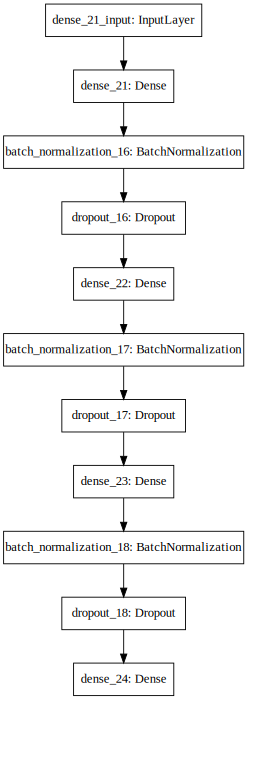

In [157]:
plot_model(model1, to_file='model1.png')
td = model_to_dot(model1, dpi=65)
td.set_size('60x12')
SVG(td.create(prog='dot', format='svg'))

In [158]:
train_model1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=100, epochs=50, 
                          shuffle=False, callbacks=[Early_stop])

Train on 602 samples, validate on 59810 samples
Epoch 1/50
602/602 [==============================] - 13s 21ms/step - loss: 0.8781 - acc: 0.5216 - val_loss: 0.5830 - val_acc: 0.7819
Epoch 2/50
602/602 [==============================] - 4s 7ms/step - loss: 0.6256 - acc: 0.6844 - val_loss: 0.3626 - val_acc: 0.9400
Epoch 3/50
602/602 [==============================] - 4s 7ms/step - loss: 0.4287 - acc: 0.8173 - val_loss: 0.2586 - val_acc: 0.9674
Epoch 4/50
602/602 [==============================] - 4s 6ms/step - loss: 0.3700 - acc: 0.8605 - val_loss: 0.1919 - val_acc: 0.9762
Epoch 5/50
602/602 [==============================] - 4s 6ms/step - loss: 0.3022 - acc: 0.9020 - val_loss: 0.1519 - val_acc: 0.9787
Epoch 6/50
602/602 [==============================] - 4s 6ms/step - loss: 0.2923 - acc: 0.9020 - val_loss: 0.1311 - val_acc: 0.9797
Epoch 7/50
602/602 [==============================] - 3s 6ms/step - loss: 0.2703 - acc: 0.9153 - val_loss: 0.1231 - val_acc: 0.9792
Epoch 8/50
602/602 [======

In [159]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[acc[0]-0.02,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,val_loss[-1]+0.8])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model1)

In [ ]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w,color='b')
plt.xlabel('Hidden Layer 2')

plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [160]:
score = model1.evaluate(x_test, y_test)

85443/85443 [==============================] - 11s 134us/step


In [164]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06385405394680246
Test accuracy: 0.9799866577718479


In [162]:
y_pred = model1.predict(x_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

Accuracy:  0.9799866577718479
Recall:  0.8918918918918919
Precision:  0.07228915662650602
F1 score:  0.1337386018237082


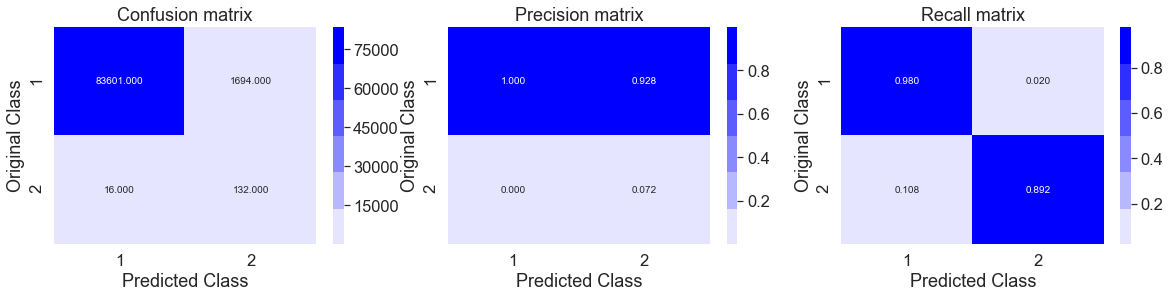

In [163]:
plot_confusion_matrix(y_test, y_pred.round())

### Summary

In [439]:
from prettytable import PrettyTable

x = PrettyTable()
x.title="Model Comparison"
x.field_names = ["Model","f1_score","Accuracy","Precision", "Recall"]
x.add_row(["Hyperparameter tuned Logistic Regression",17.13,98.57,9.52,85.13])
x.add_row(["Hyperparameter tuned Random Forest", 25.96, 99.16, 15.33, 84.45])
x.add_row(["Hyperparameter tuned XG Boost", 14.05, 98.16, 7.64, 86.48])
x.add_row(["2 Hidden layer MLP, keras",13.37, 97.99, 7.22, 89.18])

print(x)

+-------------------------------------------------------------------------------------+
|                                   Model Comparison                                  |
+------------------------------------------+----------+----------+-----------+--------+
|                  Model                   | f1_score | Accuracy | Precision | Recall |
+------------------------------------------+----------+----------+-----------+--------+
| Hyperparameter tuned Logistic Regression |  17.13   |  98.57   |    9.52   | 85.13  |
|    Hyperparameter tuned Random Forest    |  25.96   |  99.16   |   15.33   | 84.45  |
|      Hyperparameter tuned XG Boost       |  14.05   |  98.16   |    7.64   | 86.48  |
|        2 Hidden layer MLP, keras         |  13.37   |  97.99   |    7.22   | 89.18  |
+------------------------------------------+----------+----------+-----------+--------+


## Condensed Nearest Neighbor Undersampling

- Lets try another undersampling technique `condensed nearestneighbor` it takes into consideration the nearest neighbors to sample the majority class

In [334]:
#we undersample only the train data
from imblearn.under_sampling import CondensedNearestNeighbour

undersample = CondensedNearestNeighbour(n_neighbors=3)
x_usample, y_usample = undersample.fit_resample(x_train.values, y_train.values)

In [335]:
counter = Counter(y_train.values.ravel())
print(counter)
counter = Counter(y_usample)
print(counter)

Counter({0: 139313, 1: 241})
Counter({0: 305, 1: 241})


In [337]:
x_train = pd.DataFrame(x_usample)
y_train = pd.DataFrame(y_usample)

In [360]:
print('the number of fraudulent transactions in train data is', y_train[0].value_counts()[1], 'and non fraudulent transactions is', y_train[0].value_counts()[0])
print('the number of fraudulent transactions in test data is', y_test['Class'].value_counts()[1], 'and non fraudulent transactions is', y_test['Class'].value_counts()[0])
print('the number of fraudulent transactions in validation data is', y_val['Class'].value_counts()[1], 'and non fraudulent transactions is', y_val['Class'].value_counts()[0])


the number of fraudulent transactions in train data is 241 and non fraudulent transactions is 305
the number of fraudulent transactions in test data is 148 and non fraudulent transactions is 85295
the number of fraudulent transactions in validation data is 103 and non fraudulent transactions is 59707


## Dimensionality Reduction

### PCA

- lets visualize the undersampled dataset

In [338]:
features = x_train
labels = y_train

In [339]:
pca =  PCA(n_components=2, random_state = 0) 
X_pca_embed = pca.fit_transform(features.values)

for_pca = np.hstack((X_pca_embed, labels.values.reshape(-1,1)))
for_pca_df = pd.DataFrame(data=for_pca, columns=['Dimension_x','Dimension_y','Class'])

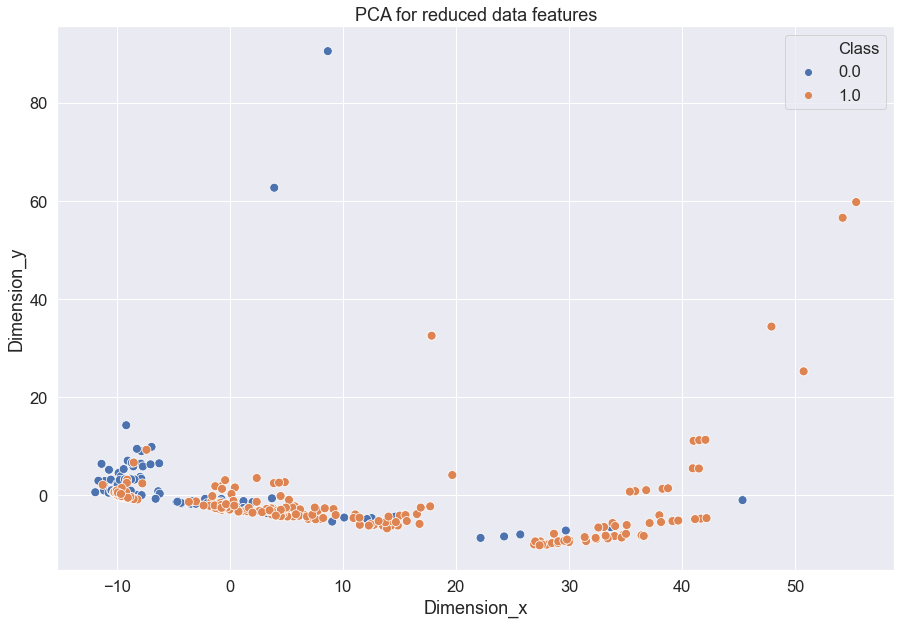

In [340]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Dimension_x', y='Dimension_y', hue='Class', data=for_pca_df, s=80)
plt.title('PCA for reduced data features')
plt.legend()
plt.show()

### TSNE with perplexity = 50

In [341]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, random_state = 0)
X_tsne_embed = tsne.fit_transform(features.values)
    
for_tsne = np.hstack((X_tsne_embed, labels.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Class'])

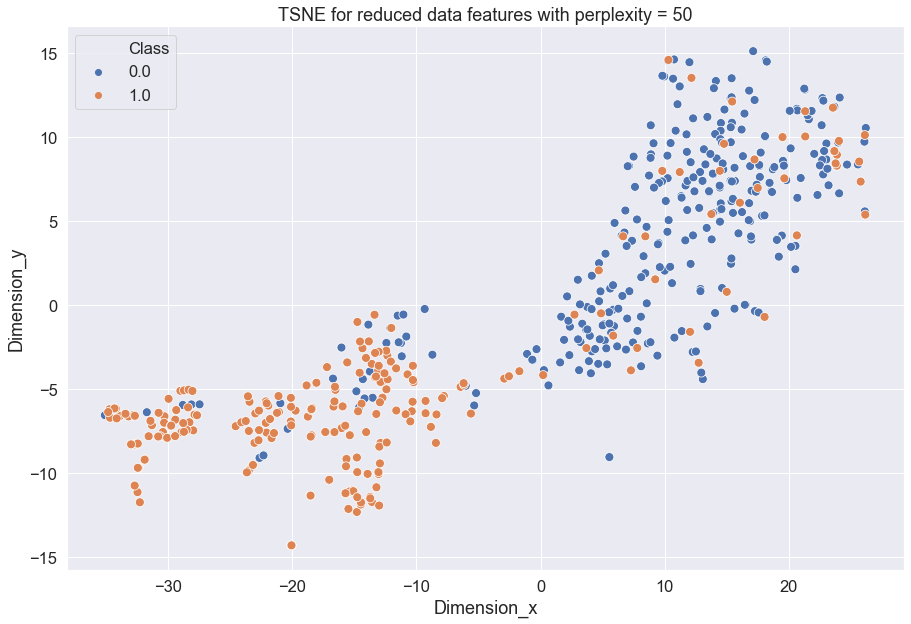

In [342]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Dimension_x', y='Dimension_y', hue='Class', data=for_tsne_df, s=80)
plt.title('TSNE for reduced data features with perplexity = 50')
plt.legend()
plt.show()

- as we can see `condesed nearest neighbor` algorithm has preserved the neighborhood relationship between the classes while sampling the majority class
- lets try and fit a knearest neighbor classifier

## Fitting Machine learning Models to the undersampled Data

### KNearest Neighbors Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1966s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1109s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1199s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   11.2s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.3min finished


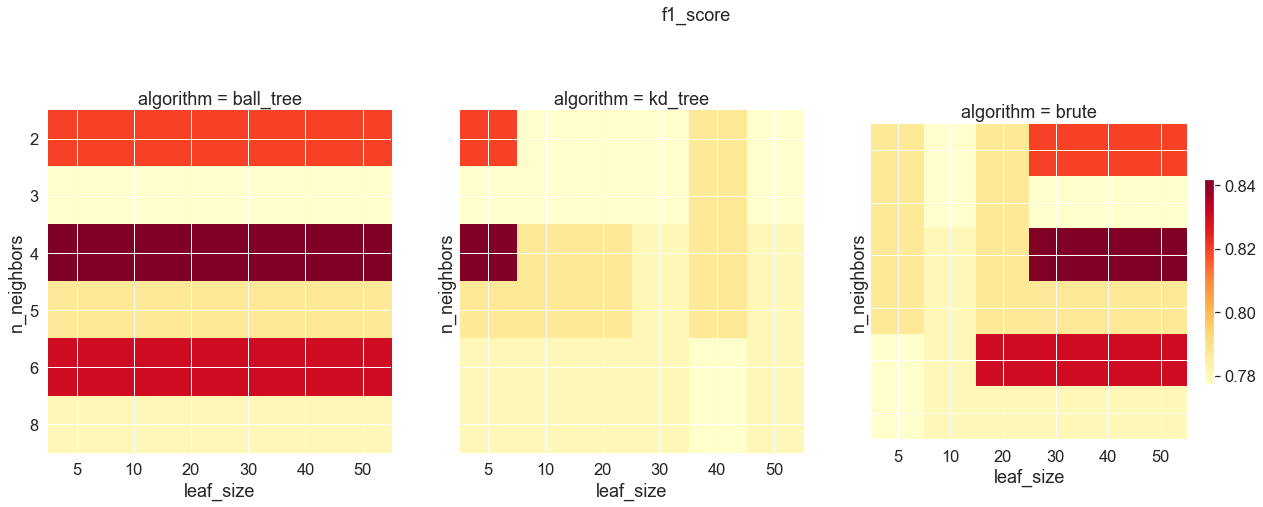

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_jobs=4,
                     n_neighbors=4) 0.8421052631578948


In [362]:
from sklearn.neighbors import KNeighborsClassifier
param={'n_neighbors':[2, 3, 4, 5, 6, 8],
      'algorithm':['ball_tree','kd_tree','brute'],
      'leaf_size':[5,10,20,30,40,50]}

paramGrid = ParameterGrid(param)
bestModel, bestScore, allModels, allScores = pf.bestFit(KNeighborsClassifier(n_jobs=4), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [363]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9994850368081645
Recall:  0.7364864864864865
Precision:  0.956140350877193
F1 score:  0.8320610687022901


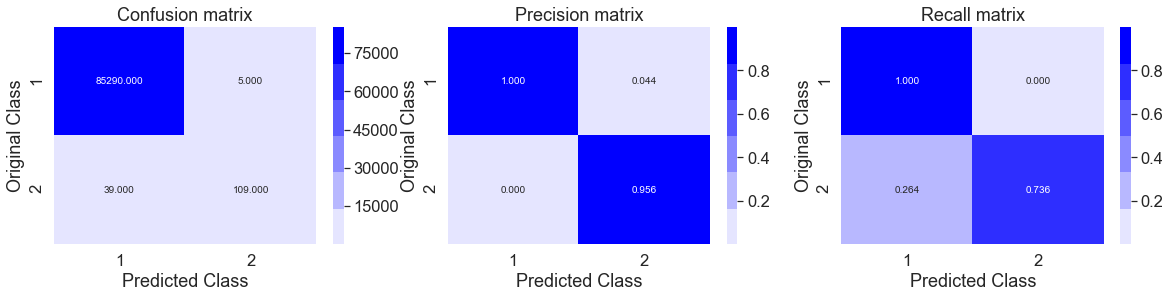

In [364]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.791659540695436


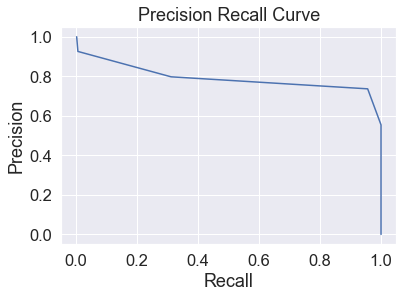

In [365]:
plot_precison_recall_curve(bestModel, x_test, y_test)

### Logistic Regression

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    9.6s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    9.7s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    9.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.9s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.7s finished


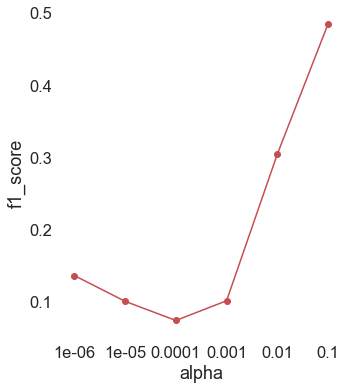

SGDClassifier(alpha=0.1, loss='log', random_state=0) 0.48387096774193555


In [357]:
param={'alpha':[0.000001,0.00001,0.0001, 0.001, 0.01, 0.1]}

paramGrid = ParameterGrid(param)
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier(loss='log', random_state=0), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [358]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9974368877497279
Recall:  0.722972972972973
Precision:  0.37543859649122807
F1 score:  0.4942263279445728


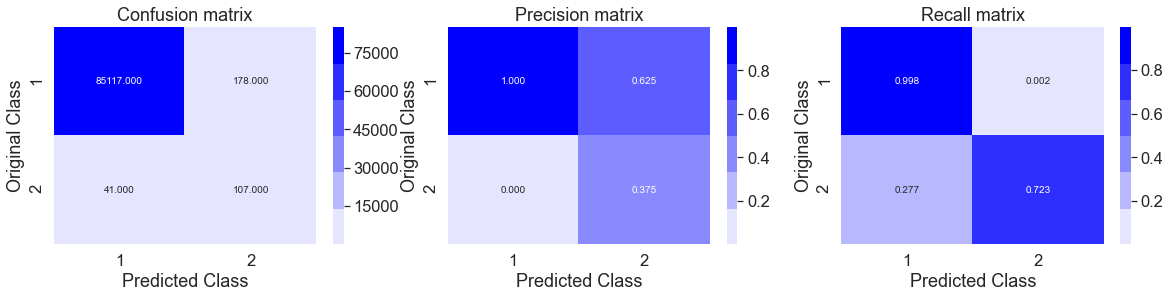

In [359]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.4759250969255031


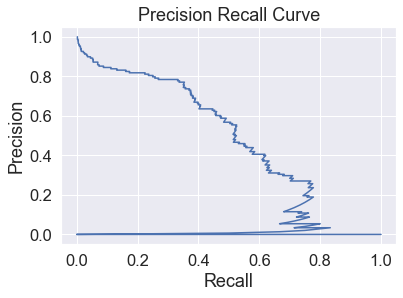

In [361]:
plot_precison_recall_curve(bestModel, x_test, y_test)

### Random Forest classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:   13.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   13.4s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   26.4s finished


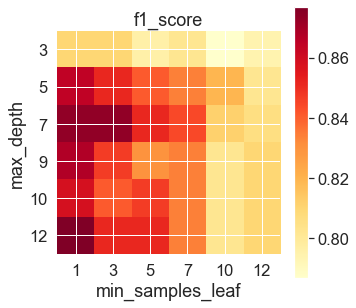

RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=4,
                       random_state=0) 0.8770053475935828


In [366]:
param_grid = {
    'max_depth':[3,5,7,9,10,12],
    'min_samples_leaf':[1, 3, 5, 7, 10, 12]
}

paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(RandomForestClassifier(criterion='entropy',random_state=0, n_jobs=4), 
                                                        paramGrid, x_train, y_train, x_val, y_val, metric = f1_score, 
                                                        scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [367]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9995435553526912
Recall:  0.7837837837837838
Precision:  0.943089430894309
F1 score:  0.8560885608856088


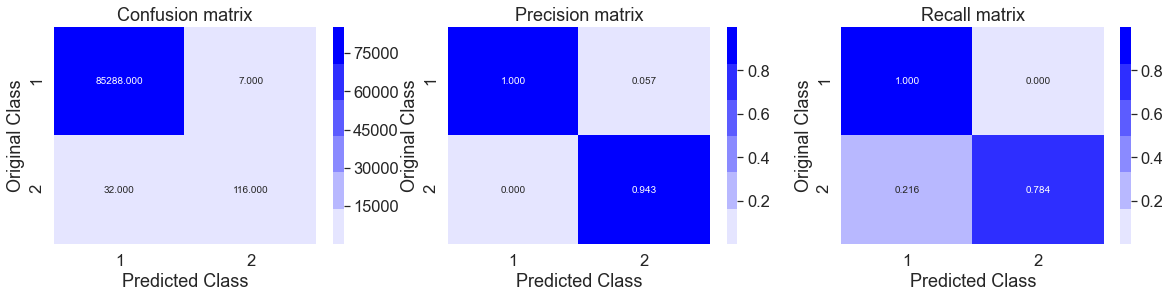

In [368]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.8193630431611905


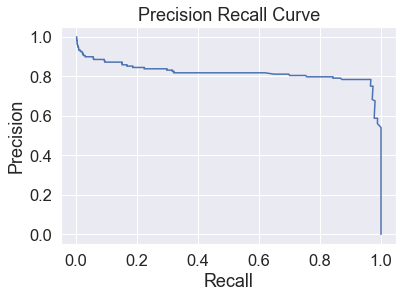

In [369]:
plot_precison_recall_curve(bestModel, x_test, y_test)

__Feature Importance__

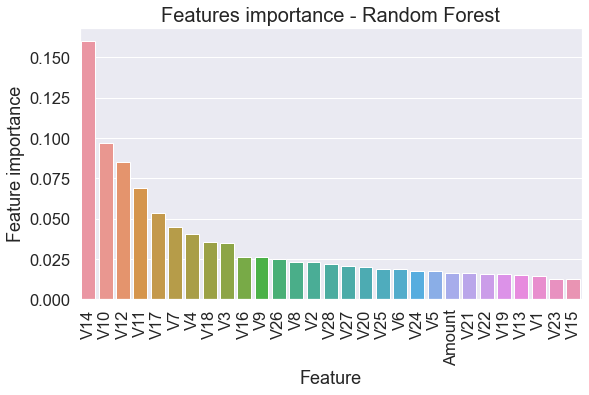

In [370]:
feature_importance(bestModel, feats, 'Random Forest')

### XG Boost Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:   21.1s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.4s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.3s finished


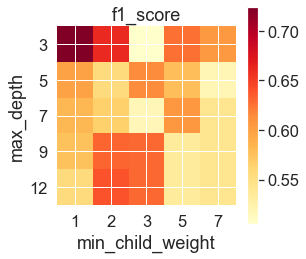

XGBClassifier(missing=nan, n_jobs=4) 0.7239819004524887


In [377]:
param_grid = {'max_depth':[3, 5, 7, 9, 12],
         'min_child_weight':[1,2,3,5,7]}

paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(xgb.XGBClassifier(random_state=0, n_jobs=4), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [379]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9990285921608558
Recall:  0.777027027027027
Precision:  0.696969696969697
F1 score:  0.7348242811501597


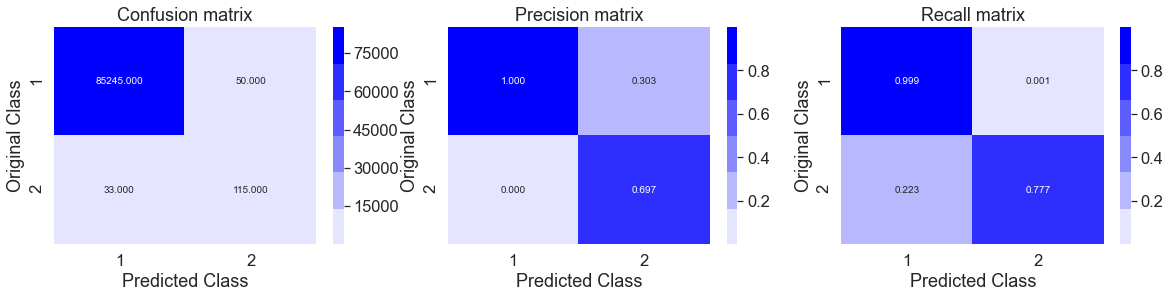

In [380]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.7803618707213394


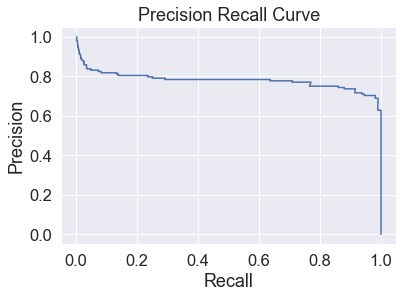

In [381]:
plot_precison_recall_curve(bestModel, x_test, y_test)

__Feature Importance__

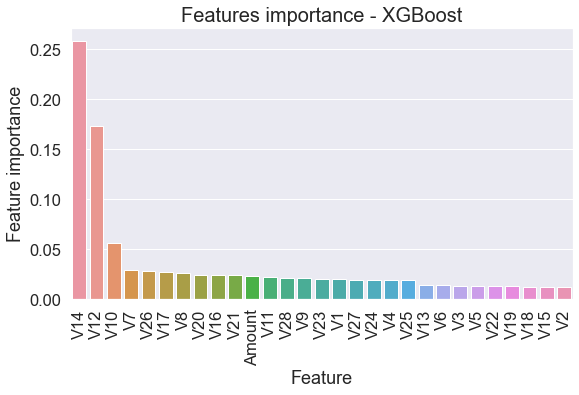

In [382]:
feature_importance(bestModel, feats, 'XGBoost')

### Fitting a MLP model with 2 hidden layers

In [403]:
Early_stop= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=8,verbose=0, mode='min', 
                                          restore_best_weights= True)

model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(output_dim, activation='sigmoid'))
model1.save('model2.h5')

In [408]:
model1.compile(keras.optimizers.Adam(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [409]:
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 128)               3840      
_________________________________________________________________
batch_normalization_49 (Batc (None, 128)               512       
_________________________________________________________________
dropout_49 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_50 (Batc (None, 64)                256       
_________________________________________________________________
dropout_50 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 32)              

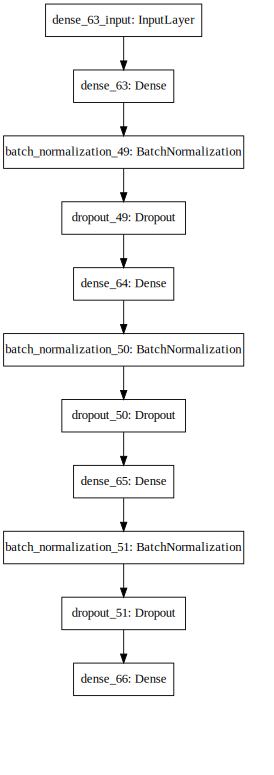

In [410]:
plot_model(model1, to_file='model1.png')
td = model_to_dot(model1, dpi=65)
td.set_size('60x12')
SVG(td.create(prog='dot', format='svg'))

In [411]:
train_model1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=32, epochs=50, callbacks=[Early_stop])

Train on 546 samples, validate on 59810 samples
Epoch 1/50
546/546 [==============================] - 34s 62ms/step - loss: 0.5877 - acc: 0.7070 - val_loss: 0.2429 - val_acc: 0.9967
Epoch 2/50
546/546 [==============================] - 15s 28ms/step - loss: 0.4799 - acc: 0.8095 - val_loss: 0.1782 - val_acc: 0.9984
Epoch 3/50
546/546 [==============================] - 15s 28ms/step - loss: 0.4335 - acc: 0.8260 - val_loss: 0.1548 - val_acc: 0.9988
Epoch 4/50
546/546 [==============================] - 16s 29ms/step - loss: 0.4436 - acc: 0.8242 - val_loss: 0.1362 - val_acc: 0.9993
Epoch 5/50
546/546 [==============================] - 15s 28ms/step - loss: 0.4146 - acc: 0.8370 - val_loss: 0.1333 - val_acc: 0.9993
Epoch 6/50
546/546 [==============================] - 16s 29ms/step - loss: 0.4084 - acc: 0.8388 - val_loss: 0.1273 - val_acc: 0.9994
Epoch 7/50
546/546 [==============================] - 15s 28ms/step - loss: 0.4107 - acc: 0.8516 - val_loss: 0.1232 - val_acc: 0.9994
Epoch 8/50
546

In [412]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[acc[0]-0.007,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,val_loss[-1]+1])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model1)

In [ ]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w,color='b')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [413]:
score = model1.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

85443/85443 [==============================] - 19s 226us/step
Test score: 0.09156894284194199
Test accuracy: 0.9986891846026006


In [414]:
y_pred = model1.predict(x_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

Accuracy:  0.9986891846026006
Recall:  0.7837837837837838
Precision:  0.5918367346938775
F1 score:  0.6744186046511628


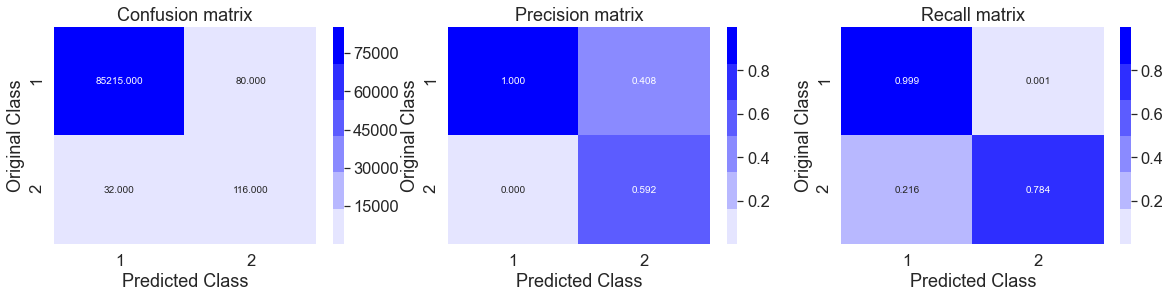

In [415]:
plot_confusion_matrix(y_test, y_pred.round())

### Summary

In [440]:
from prettytable import PrettyTable

x = PrettyTable()
x.title="Model Comparison"
x.field_names = ["Model","f1_score","Accuracy","Precision", "Recall"]
x.add_row(["Hyperparameter tuned KNearest Neighbor",83.20, 99.94, 95.61, 73.64])
x.add_row(["Hyperparameter tuned Logistic Regression", 49.42, 99.74, 37.54, 72.29])
x.add_row(["Hyperparameter tuned Random Forest", 85.60, 99.95, 94.30, 78.37])
x.add_row(["Hyperparameter tuned XG Boost", 73.48, 99.90, 69.69, 77.70])
x.add_row(["2 Hidden layers MLP, keras",67.44, 99.86, 59.18, 78.37])

print(x)

+-------------------------------------------------------------------------------------+
|                                   Model Comparison                                  |
+------------------------------------------+----------+----------+-----------+--------+
|                  Model                   | f1_score | Accuracy | Precision | Recall |
+------------------------------------------+----------+----------+-----------+--------+
|  Hyperparameter tuned KNearest Neighbor  |   83.2   |  99.94   |   95.61   | 73.64  |
| Hyperparameter tuned Logistic Regression |  49.42   |  99.74   |   37.54   | 72.29  |
|    Hyperparameter tuned Random Forest    |   85.6   |  99.95   |    94.3   | 78.37  |
|      Hyperparameter tuned XG Boost       |  73.48   |   99.9   |   69.69   |  77.7  |
|        2 Hidden layers MLP, keras        |  67.44   |  99.86   |   59.18   | 78.37  |
+------------------------------------------+----------+----------+-----------+--------+


## OverSampling Dataset (SMOTE)

- Now lets try oversampling the minority class using SMOTE

In [247]:
# Train-test split
X = dataset.drop(['Class'],axis=1)
Y = dataset.iloc[:,-1:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.3, random_state=0)

In [248]:
smote = SMOTE(random_state = 0)
print("normal data distribution: {}".format(Counter(y_train.values.ravel())))
X_sample, y_sample = smote.fit_sample(x_train, y_train.values.ravel())
print("SMOTE data distribution: {}".format(Counter(y_sample)))

normal data distribution: Counter({0: 139313, 1: 241})
SMOTE data distribution: Counter({0: 139313, 1: 139313})


In [249]:
x_train = pd.DataFrame(X_sample)
y_train = pd.DataFrame(y_sample)

In [170]:
print('the number of fraudulent transactions in train data is', y_train[0].value_counts()[1], 'and non fraudulent transactions is', y_train[0].value_counts()[0])
print('the number of fraudulent transactions in test data is', y_test['Class'].value_counts()[1], 'and non fraudulent transactions is', y_test['Class'].value_counts()[0])
print('the number of fraudulent transactions in validation data is', y_val['Class'].value_counts()[1], 'and non fraudulent transactions is', y_val['Class'].value_counts()[0])


the number of fraudulent transactions in train data is 139313 and non fraudulent transactions is 139313
the number of fraudulent transactions in test data is 148 and non fraudulent transactions is 85295
the number of fraudulent transactions in validation data is 103 and non fraudulent transactions is 59707


## Fitting Machine Learning models on SMOTE oversampled data

### Logistic Regression

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   13.0s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   13.7s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   14.4s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.4s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.8s finished


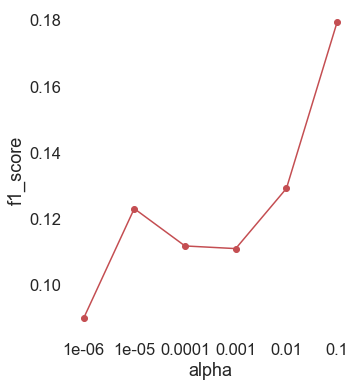

SGDClassifier(alpha=0.1, loss='log', random_state=0) 0.17948717948717946


In [172]:
param={'alpha':[0.000001,0.00001,0.0001, 0.001, 0.01, 0.1]}

paramGrid = ParameterGrid(param)
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier(loss='log', random_state=0), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [173]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9862013272005898
Recall:  0.8648648648648649
Precision:  0.09945609945609946
F1 score:  0.178397212543554


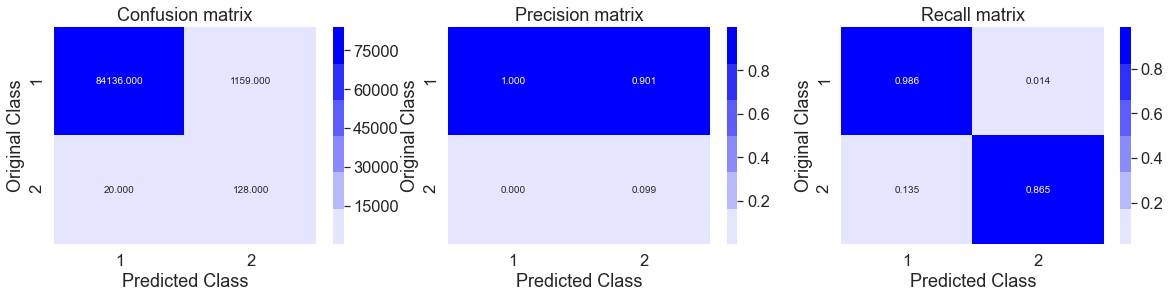

In [174]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.6238815589984307


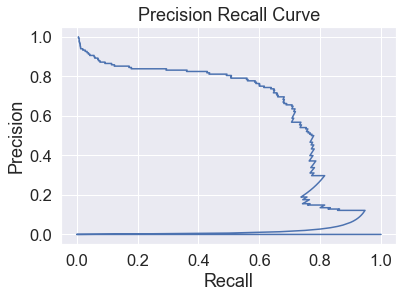

In [175]:
plot_precison_recall_curve(bestModel, x_test, y_test)

### Random Forest Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 44.2min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 45.6min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   27.7s finished


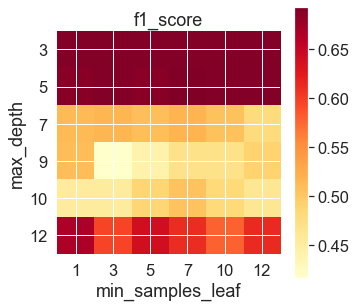

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       n_jobs=4, random_state=0) 0.6932270916334662


In [177]:
param_grid = {
    'max_depth':[3,5,7,9,10,12],
    'min_samples_leaf':[1, 3, 5, 7, 10, 12]
}

paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(RandomForestClassifier(criterion='entropy',random_state=0, n_jobs=4), 
                                                        paramGrid, x_train, y_train, x_val, y_val, metric = f1_score, 
                                                        scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [178]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.998735999438222
Recall:  0.8445945945945946
Precision:  0.5952380952380952
F1 score:  0.6983240223463688


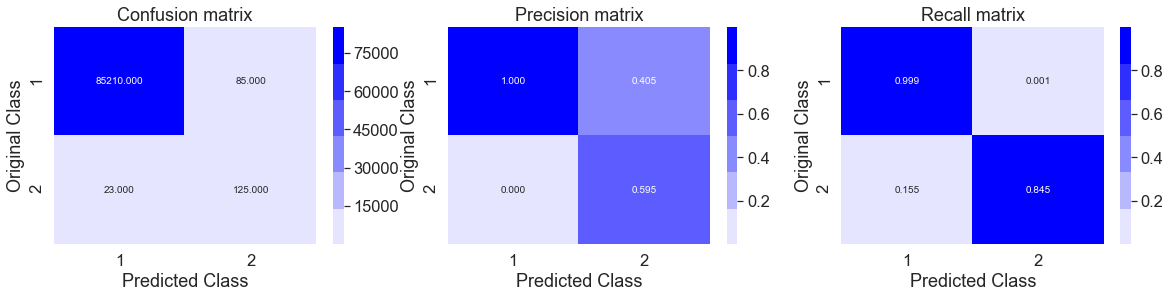

In [179]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.784161014313095


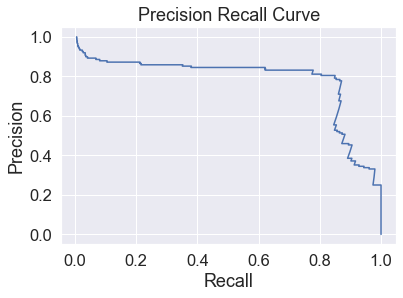

In [180]:
plot_precison_recall_curve(bestModel, x_test, y_test)

__Feature Importance__

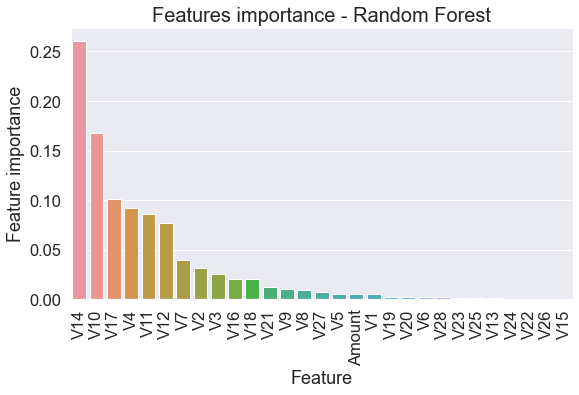

In [181]:
feature_importance(bestModel, feats, 'Random Forest')

### XGBoost Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 44.1min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 49.1min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.8s finished


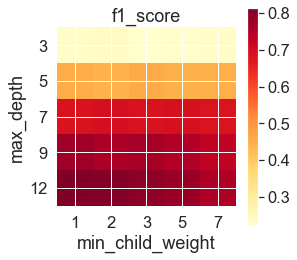

XGBClassifier(max_depth=12, missing=nan, n_jobs=4) 0.8133971291866029


In [182]:
param_grid = {'max_depth':[3, 5, 7, 9, 12],
         'min_child_weight':[1,2,3,5,7]}

paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(xgb.XGBClassifier(random_state=0, n_jobs=4), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [183]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9992158515033414
Recall:  0.8108108108108109
Precision:  0.7547169811320755
F1 score:  0.7817589576547231


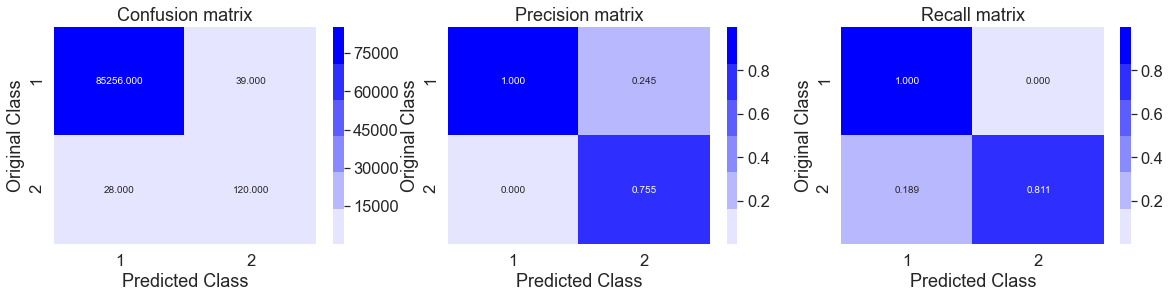

In [184]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.8313173051704162


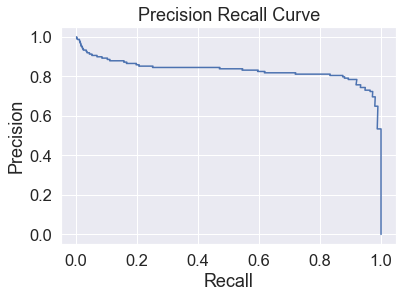

In [185]:
plot_precison_recall_curve(bestModel, x_test, y_test)

__Feature Importance__

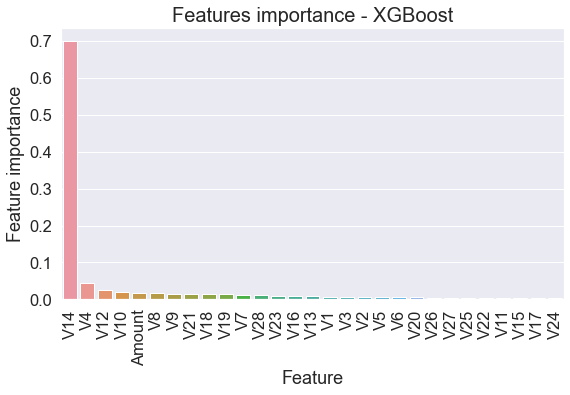

In [186]:
feature_importance(bestModel, feats, 'XGBoost')

### Fitting a MLP model with 4 hidden layers

In [250]:
Early_stop= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10,verbose=0, mode='min', 
                                          restore_best_weights= True)

model1 = Sequential()
model1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(output_dim, activation='sigmoid'))
model1.save('model2.h5')

In [251]:
model1.compile(keras.optimizers.Adam(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [252]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               7680      
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)               512       
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)              

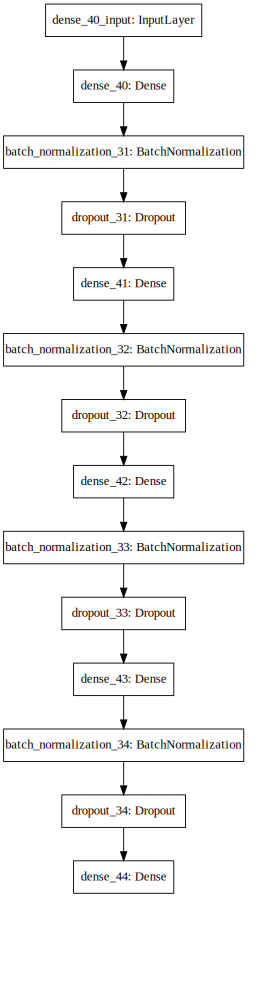

In [253]:
plot_model(model1, to_file='model1.png')
td = model_to_dot(model1, dpi=65)
td.set_size('60x12')
SVG(td.create(prog='dot', format='svg'))

In [254]:
train_model1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=400, epochs=80, 
                          shuffle=True, callbacks=[Early_stop])

Train on 278626 samples, validate on 59810 samples
Epoch 1/80
278626/278626 [==============================] - 49s 177us/step - loss: 0.0675 - acc: 0.9750 - val_loss: 0.0176 - val_acc: 0.9945
Epoch 2/80
278626/278626 [==============================] - 31s 110us/step - loss: 0.0130 - acc: 0.9961 - val_loss: 0.0089 - val_acc: 0.9982
Epoch 3/80
278626/278626 [==============================] - 28s 99us/step - loss: 0.0086 - acc: 0.9977 - val_loss: 0.0083 - val_acc: 0.9985
Epoch 4/80
278626/278626 [==============================] - 30s 107us/step - loss: 0.0059 - acc: 0.9985 - val_loss: 0.0085 - val_acc: 0.9985
Epoch 5/80
278626/278626 [==============================] - 25s 91us/step - loss: 0.0045 - acc: 0.9989 - val_loss: 0.0069 - val_acc: 0.9990
Epoch 6/80
278626/278626 [==============================] - 26s 93us/step - loss: 0.0038 - acc: 0.9991 - val_loss: 0.0072 - val_acc: 0.9989
Epoch 7/80
278626/278626 [==============================] - 26s 94us/step - loss: 0.0033 - acc: 0.9993 - v

In [255]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[acc[0]-0.007,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,val_loss[-1]+0.08])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model1)

In [ ]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w,color='b')
plt.xlabel('Hidden Layer 2')

plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [260]:
score = model1.evaluate(x_test, y_test)

85443/85443 [==============================] - 23s 264us/step


In [261]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.005477050108551674
Test accuracy: 0.9992977774656788


In [262]:
y_pred = model1.predict(x_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

Accuracy:  0.9992977774656788
Recall:  0.75
Precision:  0.8283582089552238
F1 score:  0.7872340425531914


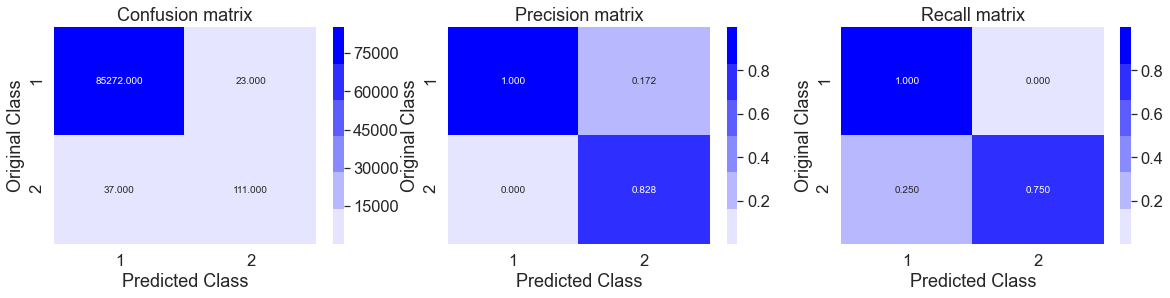

In [263]:
plot_confusion_matrix(y_test, y_pred.round())

### Summary

In [441]:
from prettytable import PrettyTable

x = PrettyTable()
x.title="Model Comparison"
x.field_names = ["Model","f1_score","Accuracy","Precision", "Recall"]
x.add_row(["Hyperparameter tuned Logistic Regression",17.83, 98.62, 9.94, 86.48])
x.add_row(["Hyperparameter tuned Random Forest", 69.83, 99.87, 59.52, 84.45])
x.add_row(["Hyperparameter tuned XG Boost", 78.17, 99.92, 75.47, 81.08])
x.add_row(["3 Hidden layer MLP, keras",78.72, 99.92, 82.83, 75.0])

print(x)

+-------------------------------------------------------------------------------------+
|                                   Model Comparison                                  |
+------------------------------------------+----------+----------+-----------+--------+
|                  Model                   | f1_score | Accuracy | Precision | Recall |
+------------------------------------------+----------+----------+-----------+--------+
| Hyperparameter tuned Logistic Regression |  17.83   |  98.62   |    9.94   | 86.48  |
|    Hyperparameter tuned Random Forest    |  69.83   |  99.87   |   59.52   | 84.45  |
|      Hyperparameter tuned XG Boost       |  78.17   |  99.92   |   75.47   | 81.08  |
|        3 Hidden layer MLP, keras         |  78.72   |  99.92   |   82.83   |  75.0  |
+------------------------------------------+----------+----------+-----------+--------+


## OverSampling Dataset (ADASYN)

- Now lets try one more oversampling technique ADASYN

In [264]:
#Train-test split
X = dataset.drop(['Class'],axis=1)
Y = dataset.iloc[:,-1:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.3, random_state=0)

In [265]:
adasyn = ADASYN(random_state = 0)
print("normal data distribution: {}".format(Counter(y_train.values.ravel())))
X_sample, y_sample = adasyn.fit_sample(x_train, y_train.values.ravel())
print("SMOTE data distribution: {}".format(Counter(y_sample)))

normal data distribution: Counter({0: 139313, 1: 241})
SMOTE data distribution: Counter({0: 139313, 1: 139306})


In [266]:
x_train = pd.DataFrame(X_sample)
y_train = pd.DataFrame(y_sample)

In [267]:
print('the number of fraudulent transactions in train data is', y_train[0].value_counts()[1], 'and non fraudulent transactions is', y_train[0].value_counts()[0])
print('the number of fraudulent transactions in test data is', y_test['Class'].value_counts()[1], 'and non fraudulent transactions is', y_test['Class'].value_counts()[0])
print('the number of fraudulent transactions in validation data is', y_val['Class'].value_counts()[1], 'and non fraudulent transactions is', y_val['Class'].value_counts()[0])


the number of fraudulent transactions in train data is 139306 and non fraudulent transactions is 139313
the number of fraudulent transactions in test data is 148 and non fraudulent transactions is 85295
the number of fraudulent transactions in validation data is 103 and non fraudulent transactions is 59707


## Fitting Machine Learning models on new ADASYN oversampled data

### Logistic Regression

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   10.8s remaining:   21.6s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   11.8s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   12.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   22.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   22.7s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.0s finished


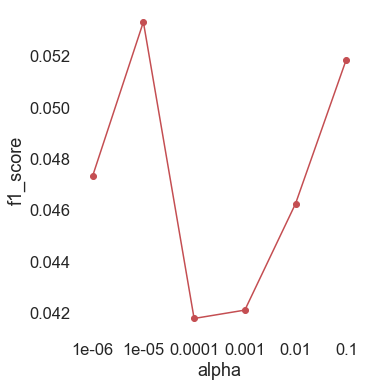

SGDClassifier(alpha=1e-05, loss='log', random_state=0) 0.053341148886283704


In [268]:
param={'alpha':[0.000001,0.00001,0.0001, 0.001, 0.01, 0.1]}

paramGrid = ParameterGrid(param)
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier(loss='log', random_state=0), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [269]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9455426424633967
Recall:  0.9121621621621622
Precision:  0.028272251308900525
F1 score:  0.05484460694698355


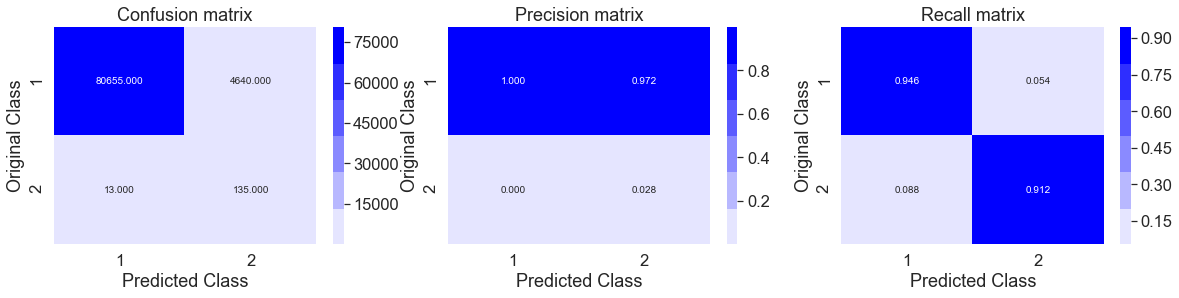

In [270]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.7758027874639593


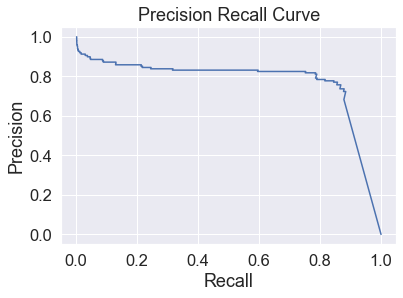

In [271]:
plot_precison_recall_curve(bestModel, x_test, y_test)

### Random Forest Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 42.5min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 43.9min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   27.7s finished


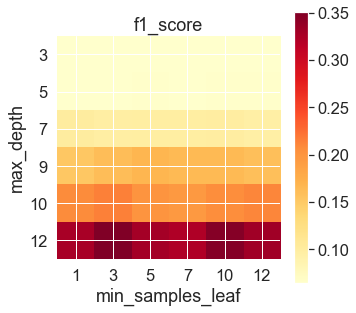

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3,
                       n_jobs=4, random_state=0) 0.3512396694214876


In [272]:
param_grid = {
    'max_depth':[3,5,7,9,10,12],
    'min_samples_leaf':[1, 3, 5, 7, 10, 12]
}

paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(RandomForestClassifier(criterion='entropy',random_state=0, n_jobs=4), 
                                                        paramGrid, x_train, y_train, x_val, y_val, metric = f1_score, 
                                                        scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [273]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9951429608042789
Recall:  0.8175675675675675
Precision:  0.23772102161100198
F1 score:  0.36834094368340947


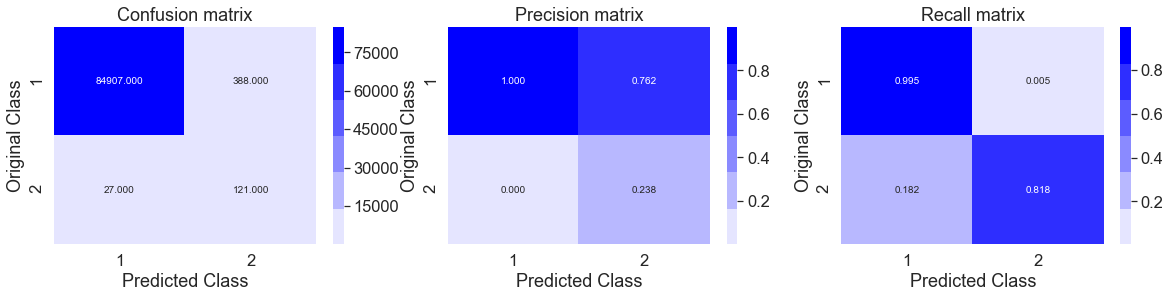

In [274]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.7608541690917952


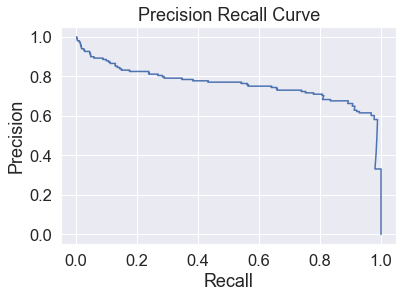

In [275]:
plot_precison_recall_curve(bestModel, x_test, y_test)

__Feature Importance__

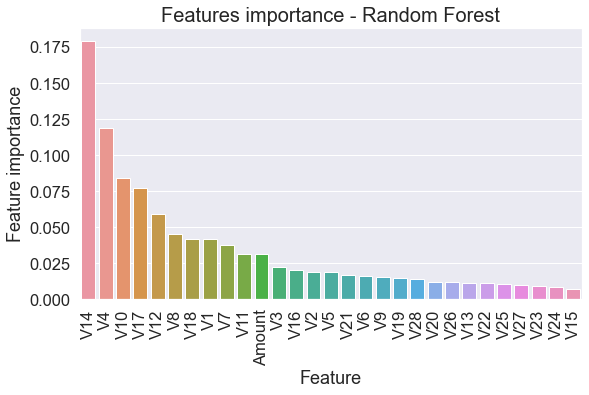

In [276]:
feature_importance(bestModel, feats, 'Random Forest')

### XGBoost classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 46.0min remaining:  8.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 51.2min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   18.2s finished


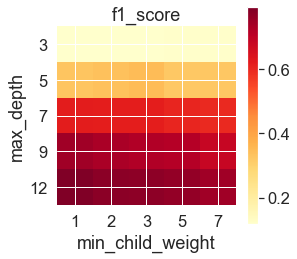

XGBClassifier(max_depth=12, missing=nan, n_jobs=4) 0.7926267281105991


In [277]:
param_grid = {'max_depth':[3, 5, 7, 9, 12],
         'min_child_weight':[1,2,3,5,7]}

paramGrid = ParameterGrid(param_grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(xgb.XGBClassifier(random_state=0, n_jobs=4), paramGrid,
           x_train, y_train, x_val, y_val, metric = f1_score, scoreLabel = "f1_score", n_jobs=-1, nfolds=5)

print(bestModel, bestScore)

In [278]:
y_pred= bestModel.predict(x_test)

Accuracy:  0.9992977774656788
Recall:  0.8175675675675675
Precision:  0.7857142857142857
F1 score:  0.8013245033112583


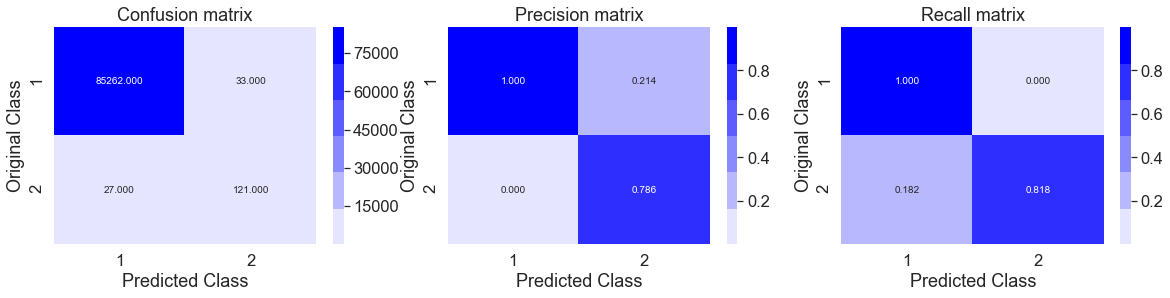

In [279]:
plot_confusion_matrix(y_test,y_pred)

Area under precision recall curve:  0.8327568939715703


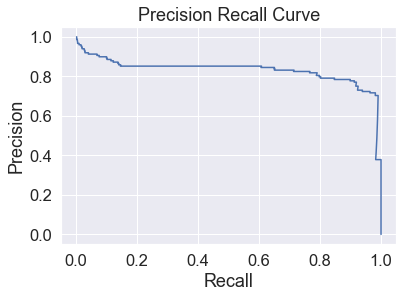

In [280]:
plot_precison_recall_curve(bestModel, x_test, y_test)

__Feature Importance__

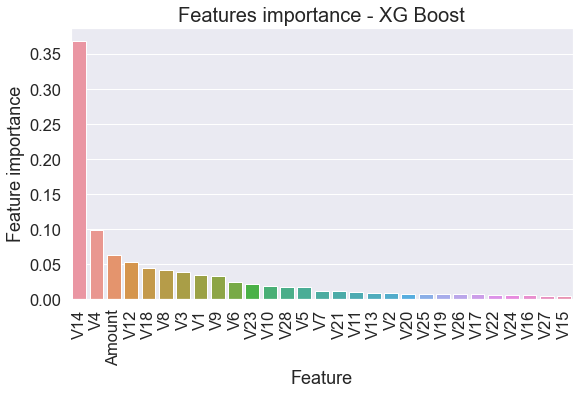

In [281]:
feature_importance(bestModel, feats, 'XG Boost')

## Fitting a MLP model with 4 hidden layers

In [295]:
Early_stop= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10,verbose=0, mode='min', 
                                          restore_best_weights= True)

model1 = Sequential()
model1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(output_dim, activation='sigmoid'))
model1.save('model3.h5')

In [296]:
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [297]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               7680      
_________________________________________________________________
batch_normalization_39 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_40 (Batc (None, 128)               512       
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)              

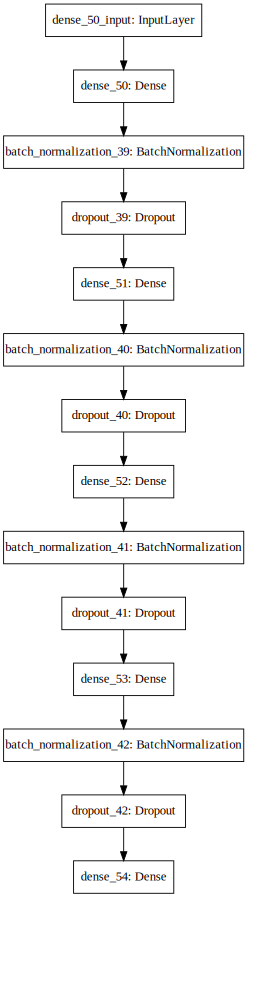

In [298]:
plot_model(model1, to_file='model1.png')
td = model_to_dot(model1, dpi=65)
td.set_size('60x12')
SVG(td.create(prog='dot', format='svg'))

In [299]:
train_model1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=400, epochs=80, 
                          shuffle=True, callbacks=[Early_stop])

Train on 278619 samples, validate on 59810 samples
Epoch 1/80
278619/278619 [==============================] - 49s 174us/step - loss: 0.0817 - acc: 0.9705 - val_loss: 0.0246 - val_acc: 0.9929
Epoch 2/80
278619/278619 [==============================] - 33s 118us/step - loss: 0.0133 - acc: 0.9964 - val_loss: 0.0120 - val_acc: 0.9976
Epoch 3/80
278619/278619 [==============================] - 36s 130us/step - loss: 0.0080 - acc: 0.9980 - val_loss: 0.0095 - val_acc: 0.9983
Epoch 4/80
278619/278619 [==============================] - 39s 140us/step - loss: 0.0058 - acc: 0.9987 - val_loss: 0.0093 - val_acc: 0.9983
Epoch 5/80
278619/278619 [==============================] - 36s 129us/step - loss: 0.0045 - acc: 0.9990 - val_loss: 0.0075 - val_acc: 0.9988
Epoch 6/80
278619/278619 [==============================] - 37s 131us/step - loss: 0.0038 - acc: 0.9992 - val_loss: 0.0067 - val_acc: 0.9990
Epoch 7/80
278619/278619 [==============================] - 40s 145us/step - loss: 0.0034 - acc: 0.9993

In [300]:
plot_accuracy_and_loss(train_model1)

In [ ]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w,color='b')
plt.xlabel('Hidden Layer 2')

plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [301]:
score = model1.evaluate(x_test, y_test)

85443/85443 [==============================] - 26s 306us/step


In [302]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.005841522055593093
Test accuracy: 0.9992743700478681


In [303]:
y_pred = model1.predict(x_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

Accuracy:  0.9992743700478681
Recall:  0.7702702702702703
Precision:  0.8028169014084507
F1 score:  0.7862068965517242


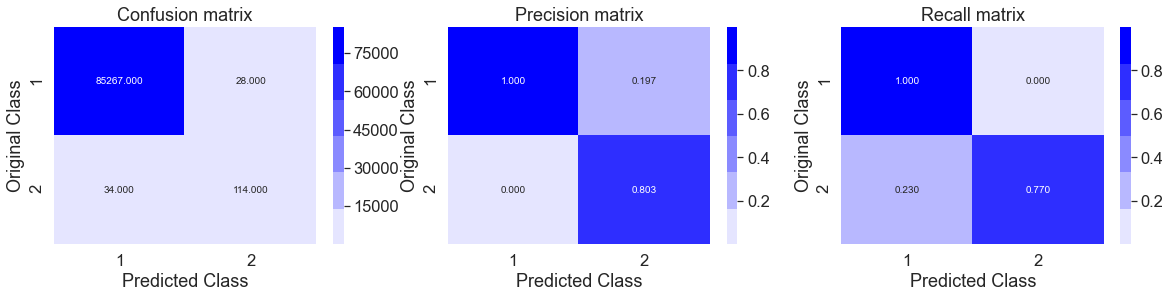

In [304]:
plot_confusion_matrix(y_test, y_pred.round())

### Summary

In [442]:
from prettytable import PrettyTable

x = PrettyTable()
x.title="Model Comparison"
x.field_names = ["Model","f1_score","Accuracy","Precision", "Recall"]
x.add_row(["Hyperparameter tuned Logistic Regression",5.48, 94.55, 2.82, 91.21])
x.add_row(["Hyperparameter tuned Random Forest", 36.83, 99.51, 23.72, 81.75])
x.add_row(["Hyperparameter tuned XG Boost", 80.13, 99.92, 78.57, 81.75])
x.add_row(["3 Hidden layer MLP, keras",78.62, 99.92, 80.28, 77.02])

print(x)

+-------------------------------------------------------------------------------------+
|                                   Model Comparison                                  |
+------------------------------------------+----------+----------+-----------+--------+
|                  Model                   | f1_score | Accuracy | Precision | Recall |
+------------------------------------------+----------+----------+-----------+--------+
| Hyperparameter tuned Logistic Regression |   5.48   |  94.55   |    2.82   | 91.21  |
|    Hyperparameter tuned Random Forest    |  36.83   |  99.51   |   23.72   | 81.75  |
|      Hyperparameter tuned XG Boost       |  80.13   |  99.92   |   78.57   | 81.75  |
|        3 Hidden layer MLP, keras         |  78.62   |  99.92   |   80.28   | 77.02  |
+------------------------------------------+----------+----------+-----------+--------+


## Conclusion

- We can see that Random forest performed very good on the model even when thw model was heavily imbalanced
- After balancing the classes using condensed nearest neighbors techique we can see that KNN classifier performed excellent with a very high precision and recall
- After balancing the classes using oversampling techniques we can see that our MLP models performed very well on the datset